In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from src.dataset import *

In [2]:
# https://data.gov.sg/dataset/resale-flat-prices
query_string = "https://data.gov.sg/api/action/datastore_search?resource_id=42ff9cfe-abe5-4b54-beda-c88f9bb438ee&limit=101994"
resp = requests.get(query_string)

In [3]:
# Convert JSON into Python Object
data = json.loads(resp.content)

In [4]:
# Checking the length of dataframe
len(data["result"]["records"])

68161

In [50]:
# Convert to dataframe
df_hdb_price=pd.DataFrame(data["result"]["records"])

In [51]:
# Let's examine our dataframe
df_hdb_price.head()
df_hdb_price.shape

(68161, 12)

In [53]:
# List of mrt and mall at dataset.py

In [ ]:
# We will use the OneMap API to obtain the (lat, long) coordinates of each MRT station.
# Obtaining MRT coordinates in Singapore
mrt_lat = []
mrt_long = []

The OneMap API is highly convenient to use. Simply include your search term in the link and it behaves just like Google search. Similar items are all listed out. Try it!

In [9]:
for i in range(0, len(list_of_mrt)):
    query_address = list_of_mrt[i]
    query_string = (
        "https://developers.onemap.sg/commonapi/search?searchVal="
        + str(query_address)
        + "&returnGeom=Y&getAddrDetails=Y"
    )
    resp = requests.get(query_string)

    data_mrt = json.loads(resp.content)

    if data_mrt["found"] != 0:
        mrt_lat.append(data_mrt["results"][0]["LATITUDE"])
        mrt_long.append(data_mrt["results"][0]["LONGITUDE"])

        print(
            str(query_address)
            + ",Lat: "
            + data_mrt["results"][0]["LATITUDE"]
            + " Long: "
            + data_mrt["results"][0]["LONGITUDE"]
        )

    else:
        mrt_lat.append("NotFound")
        mrt_lat.append("NotFound")
        print("No Results")

# Store this information in a dataframe
mrt_location = pd.DataFrame(
    {"MRT": list_of_mrt, "Latitude": mrt_lat, "Longitude": mrt_long}
)



Jurong East MRT Station,Lat: 1.332753417 Long: 103.7427536
Bukit Batok MRT Station,Lat: 1.349512469 Long: 103.7497692
Bukit Gombak MRT Station,Lat: 1.35906498 Long: 103.7517266
Choa Chu Kang MRT Station,Lat: 1.3849696919999999 Long: 103.74459190000002
Yew Tee MRT Station,Lat: 1.3975350180000001 Long: 103.7474051
Kranji MRT Station,Lat: 1.4248605980000002 Long: 103.7619343
Marsiling MRT Station,Lat: 1.4324626180000002 Long: 103.7738212
Woodlands MRT Station,Lat: 1.4348014830000002 Long: 103.7890906
Admiralty MRT Station,Lat: 1.4405333880000002 Long: 103.8013645
Sembawang MRT Station,Lat: 1.448835628 Long: 103.8201103
Canberra MRT Station,Lat: 1.443076641 Long: 103.82970259999999
Yishun MRT Station,Lat: 1.4291073580000002 Long: 103.83512359999999
Khatib MRT Station,Lat: 1.41789179 Long: 103.8331718
Yio Chu Kang MRT Station,Lat: 1.38154128 Long: 103.84495290000001
Ang Mo Kio MRT Station,Lat: 1.369428557 Long: 103.84945520000001
Bishan MRT Station,Lat: 1.3510188980000002 Long: 103.85005720

In [10]:
mrt_location.head()

,MRT,Latitude,Longitude
0,Jurong East MRT Station,1.332753417,103.7427536
1,Bukit Batok MRT Station,1.349512469,103.7497692
2,Bukit Gombak MRT Station,1.35906498,103.7517266
3,Choa Chu Kang MRT Station,1.3849696919999999,103.74459190000002
4,Yew Tee MRT Station,1.3975350180000001,103.7474051


In [11]:
# Obtaining Mall Coordinates in Singapore
mall_name = []
mall_roadname = []
mall_lat = []
mall_long = []

for i in range(0, len(list_of_shopping_mall)):
    query_address = list_of_shopping_mall[i]
    query_string = (
        "https://developers.onemap.sg/commonapi/search?searchVal="
        + str(query_address)
        + "&returnGeom=Y&getAddrDetails=Y"
    )
    resp = requests.get(query_string)
    data_mall = json.loads(resp.content)

    if data_mall["found"] != 0:
        mall_name.append(query_address)
        mall_roadname.append(data_mall["results"][0]["ROAD_NAME"])
        mall_lat.append(data_mall["results"][0]["LATITUDE"])
        mall_long.append(data_mall["results"][0]["LONGITUDE"])

        print(
            str(query_address)
            + " ,Lat: "
            + data_mall["results"][0]["LATITUDE"]
            + " Long: "
            + data_mall["results"][0]["LONGITUDE"]
        )

    else:
        print("No Results")

# Store this information in a dataframe
mall_location = pd.DataFrame(
    {
        "Mall": mall_name,
        "RoadName": mall_roadname,
        "Latitude": mall_lat,
        "Longitude": mall_long,
    }
)

100 AM ,Lat: 1.2745882179999999 Long: 103.84347070000001
313@Somerset ,Lat: 1.3010065690000001 Long: 103.83824659999999
Aperia ,Lat: 1.30974242 Long: 103.8641016
Balestier Hill Shopping Centre ,Lat: 1.326124169 Long: 103.8437095
Bugis Cube ,Lat: 1.298195005 Long: 103.85565550000001
Bugis Junction ,Lat: 1.300117893 Long: 103.8561916
Bugis+ ,Lat: 1.301204089 Long: 103.8559241
Capitol Piazza ,Lat: 1.293063359 Long: 103.85129350000001
Cathay Cineleisure Orchard ,Lat: 1.301497434 Long: 103.8364448
City Gate ,Lat: 1.302347543 Long: 103.86225999999999
City Square Mall ,Lat: 1.31147745 Long: 103.8567808
CityLink Mall ,Lat: 1.292378607 Long: 103.854663
No Results
Duo ,Lat: 1.299216621 Long: 103.8579968
Far East Plaza ,Lat: 1.3073111259999999 Long: 103.83394
Funan ,Lat: 1.2912440059999999 Long: 103.8499848
Great World City ,Lat: 1.293154929 Long: 103.831928
HDB Hub ,Lat: 1.33218812 Long: 103.8470778
No Results
ION Orchard ,Lat: 1.3040425340000001 Long: 103.83188829999999
Junction 8 ,Lat: 1.35023

No Results
Pioneer Mall ,Lat: 1.341591087 Long: 103.69702009999999
Queensway Shopping Centre ,Lat: 1.287617926 Long: 103.8033911
Rochester Mall ,Lat: 1.305317927 Long: 103.7885239
Taman Jurong Shopping Centre ,Lat: 1.334844875 Long: 103.720462
The Clementi Mall ,Lat: 1.315496754 Long: 103.76457020000001
The Star Vista ,Lat: 1.30697044 Long: 103.7884203
Tiong Bahru Plaza ,Lat: 1.2864712 Long: 103.8271583
West Coast Plaza ,Lat: 1.303742583 Long: 103.7660929
No Results


In [12]:
# Now - let's find grab the geolocation of each unit that was transacated using the same method. 
# But hang on - that's a large dataset.. we can make it a bit more efficient. 
# We know that there will be multiple units that will be transacted in the same HDB Apartment block. 
# We can de-dup our dataframe and obtion the only unique addresses in our dataframe.
# Let's combine the block and street name to form the address of our transacted unit.
df_hdb_price["address"] = df_hdb_price["block"] + " " + df_hdb_price["street_name"]

# Dedup Address List
df_dedup = df_hdb_price.drop_duplicates(subset="address", keep="first")
len(df_dedup)

# Next let's grab the unique addresses and create a list
address_list = df_dedup["address"].tolist()
len(address_list)

# This may take a while...
latitude = []
longitude = []
blk_no = []
road_name = []
postal_code = []
address = []
count = 0

for row in range(len(address_list)):
    # formulate query string
    query_address = address_list[row]
    query_string = (
        "https://developers.onemap.sg/commonapi/search?searchVal="
        + str(query_address)
        + "&returnGeom=Y&getAddrDetails=Y"
    )
    resp = requests.get(query_string)

    # Convert JSON into Python Object
    data_geo_location = json.loads(resp.content)
    if data_geo_location["found"] != 0:
        latitude.append(data_geo_location["results"][0]["LATITUDE"])
        longitude.append(data_geo_location["results"][0]["LONGITUDE"])
        blk_no.append(data_geo_location["results"][0]["BLK_NO"])
        road_name.append(data_geo_location["results"][0]["ROAD_NAME"])
        postal_code.append(data_geo_location["results"][0]["POSTAL"])
        address.append(query_address)
        print(
            str(query_address)
            + " ,Lat: "
            + data_geo_location["results"][0]["LATITUDE"]
            + " Long: "
            + data_geo_location["results"][0]["LONGITUDE"]
        )
    else:
        print("No Results")

406 ANG MO KIO AVE 10 ,Lat: 1.362004539 Long: 103.85387990000001
108 ANG MO KIO AVE 4 ,Lat: 1.370966352 Long: 103.83820190000002
602 ANG MO KIO AVE 5 ,Lat: 1.38070883 Long: 103.8353682
465 ANG MO KIO AVE 10 ,Lat: 1.3662010409999998 Long: 103.857201
601 ANG MO KIO AVE 5 ,Lat: 1.381041355 Long: 103.8351317
150 ANG MO KIO AVE 5 ,Lat: 1.376806785 Long: 103.84201800000001
447 ANG MO KIO AVE 10 ,Lat: 1.3674790140000002 Long: 103.8559671
218 ANG MO KIO AVE 1 ,Lat: 1.365119086 Long: 103.84174250000001
571 ANG MO KIO AVE 3 ,Lat: 1.3700550130000002 Long: 103.8548806
534 ANG MO KIO AVE 10 ,Lat: 1.3740584630000001 Long: 103.8541682
233 ANG MO KIO AVE 3 ,Lat: 1.36754925 Long: 103.8367406
235 ANG MO KIO AVE 3 ,Lat: 1.366823609 Long: 103.8364912
219 ANG MO KIO AVE 1 ,Lat: 1.36598198 Long: 103.840654
536 ANG MO KIO AVE 10 ,Lat: 1.374473785 Long: 103.8541005
230 ANG MO KIO AVE 3 ,Lat: 1.3688544519999999 Long: 103.8378964
570 ANG MO KIO AVE 3 ,Lat: 1.369743586 Long: 103.85602309999999
624 ANG MO KIO AVE

213 BT BATOK ST 21 ,Lat: 1.346818455 Long: 103.7524969
219 BT BATOK ST 21 ,Lat: 1.347207298 Long: 103.7549997
235 BT BATOK EAST AVE 5 ,Lat: 1.348483521 Long: 103.7563004
130 BT BATOK WEST AVE 6 ,Lat: 1.35106126 Long: 103.7458574
212 BT BATOK ST 21 ,Lat: 1.347192811 Long: 103.7522173
346 BT BATOK ST 34 ,Lat: 1.362471404 Long: 103.7505611
226 BT BATOK CTRL ,Lat: 1.3487333780000001 Long: 103.7531743
247 BT BATOK EAST AVE 5 ,Lat: 1.349969437 Long: 103.7564978
169 BT BATOK WEST AVE 8 ,Lat: 1.346607336 Long: 103.7409093
154 BT BATOK ST 11 ,Lat: 1.3477355830000002 Long: 103.743984
260 BT BATOK EAST AVE 4 ,Lat: 1.3509125919999998 Long: 103.75902109999998
360 BT BATOK ST 31 ,Lat: 1.3610670480000002 Long: 103.7506254
217 BT BATOK ST 21 ,Lat: 1.3467339219999999 Long: 103.7547278
178 BT BATOK WEST AVE 8 ,Lat: 1.346054606 Long: 103.7426059
265 BT BATOK EAST AVE 4 ,Lat: 1.3500084019999998 Long: 103.75986280000001
134 BT BATOK WEST AVE 6 ,Lat: 1.35159087 Long: 103.74450959999999
301 BT BATOK ST 31 ,L

404 CHOA CHU KANG AVE 3 ,Lat: 1.3801296490000001 Long: 103.7388888
692B CHOA CHU KANG CRES ,Lat: 1.40067816 Long: 103.7513772
115 TECK WHYE LANE ,Lat: 1.37893678 Long: 103.7511824
422 CHOA CHU KANG AVE 4 ,Lat: 1.382256818 Long: 103.7409574
680 CHOA CHU KANG CRES ,Lat: 1.4033361080000002 Long: 103.7451317
771 CHOA CHU KANG ST 54 ,Lat: 1.3945329780000002 Long: 103.74996429999999
229 CHOA CHU KANG CTRL ,Lat: 1.3806537490000002 Long: 103.74636729999999
237 CHOA CHU KANG CTRL ,Lat: 1.3794475030000002 Long: 103.74828740000001
157 JLN TECK WHYE ,Lat: 1.379187865 Long: 103.7567829
416 CHOA CHU KANG AVE 4 ,Lat: 1.383340496 Long: 103.7420833
414 CHOA CHU KANG AVE 4 ,Lat: 1.382166605 Long: 103.7422483
239 CHOA CHU KANG CTRL ,Lat: 1.379448772 Long: 103.7475484
423 CHOA CHU KANG AVE 4 ,Lat: 1.3820241469999999 Long: 103.74031070000001
621 CHOA CHU KANG ST 62 ,Lat: 1.399146409 Long: 103.7472052
657 CHOA CHU KANG CRES ,Lat: 1.400445995 Long: 103.7498724
418 CHOA CHU KANG AVE 4 ,Lat: 1.382373008 Long: 

958 HOUGANG ST 91 ,Lat: 1.376635679 Long: 103.8797875
929 HOUGANG ST 91 ,Lat: 1.3760320430000001 Long: 103.8814979
456 HOUGANG AVE 10 ,Lat: 1.377171374 Long: 103.895401
171 HOUGANG AVE 1 ,Lat: 1.3511363730000001 Long: 103.889169
136 LOR AH SOO ,Lat: 1.349664367 Long: 103.8863021
466 HOUGANG AVE 8 ,Lat: 1.3725199209999999 Long: 103.8970056
372 HOUGANG ST 31 ,Lat: 1.362990379 Long: 103.89046390000001
461 HOUGANG AVE 10 ,Lat: 1.372736224 Long: 103.89462929999999
940 HOUGANG ST 92 ,Lat: 1.3734830709999999 Long: 103.8797778
538 HOUGANG ST 52 ,Lat: 1.3778227330000001 Long: 103.89032320000001
628 HOUGANG AVE 8 ,Lat: 1.369561785 Long: 103.8805075
407 HOUGANG AVE 10 ,Lat: 1.3729650969999998 Long: 103.8956733
705 HOUGANG AVE 2 ,Lat: 1.365647882 Long: 103.88826490000001
410 PANDAN GDNS ,Lat: 1.319009211 Long: 103.7474331
37 TEBAN GDNS RD ,Lat: 1.320531436 Long: 103.7426522
247 JURONG EAST ST 24 ,Lat: 1.342024246 Long: 103.73900970000001
250 JURONG EAST ST 24 ,Lat: 1.3426532780000002 Long: 103.739

714 JURONG WEST ST 71 ,Lat: 1.3432705280000001 Long: 103.69686300000001
671C JURONG WEST ST 65 ,Lat: 1.343872989 Long: 103.70142990000001
558 JURONG WEST ST 42 ,Lat: 1.3541982119999998 Long: 103.7173441
685A JURONG WEST ST 64 ,Lat: 1.3432583759999999 Long: 103.7041601
628 JURONG WEST ST 65 ,Lat: 1.3422041669999998 Long: 103.69944759999998
609 JURONG WEST ST 65 ,Lat: 1.337935868 Long: 103.7005865
666B JURONG WEST ST 65 ,Lat: 1.339614224 Long: 103.70195859999998
683A JURONG WEST CTRL 1 ,Lat: 1.3426090309999998 Long: 103.7048478
7 JLN BATU ,Lat: 1.302370026 Long: 103.8835964
27 JLN BAHAGIA ,Lat: 1.326021022 Long: 103.858992
76 LOR LIMAU ,Lat: 1.325024279 Long: 103.8542321
No Results
67 KALLANG BAHRU ,Lat: 1.321670213 Long: 103.8689296
49 DORSET RD ,Lat: 1.3129579820000001 Long: 103.85015870000001
57 GEYLANG BAHRU ,Lat: 1.3235378070000001 Long: 103.8691478
30 BENDEMEER RD ,Lat: 1.319303367 Long: 103.8640498
6 JLN BATU ,Lat: 1.3604120530000001 Long: 103.7628698
74 WHAMPOA DR ,Lat: 1.3247157

8 HOLLAND AVE ,Lat: 1.3065140640000001 Long: 103.794223
86 C'WEALTH CL ,Lat: 1.304384257 Long: 103.7993498
60 STRATHMORE AVE ,Lat: 1.29259189 Long: 103.8118705
11 HOLLAND DR ,Lat: 1.309053945 Long: 103.79406309999999
2 HOLLAND AVE ,Lat: 1.309344983 Long: 103.7955594
23 GHIM MOH LINK ,Lat: 1.308682479 Long: 103.7862088
52 STRATHMORE AVE ,Lat: 1.293313145 Long: 103.80825340000001
130 CLARENCE LANE ,Lat: 1.2927212670000001 Long: 103.8148357
7 GHIM MOH RD ,Lat: 1.311288236 Long: 103.7872306
21 HOLLAND DR ,Lat: 1.310976125 Long: 103.79237990000001
18 DOVER CRES ,Lat: 1.308083436 Long: 103.7830572
477 SEMBAWANG DR ,Lat: 1.452084619 Long: 103.8165542
322 SEMBAWANG CL ,Lat: 1.445559889 Long: 103.81829640000001
335 SEMBAWANG CL ,Lat: 1.447686569 Long: 103.81549720000001
504B MONTREAL DR ,Lat: 1.45088208 Long: 103.8233257
489 ADMIRALTY LINK ,Lat: 1.4549511919999998 Long: 103.81681979999999
467 ADMIRALTY DR ,Lat: 1.4522266769999999 Long: 103.8144259
413 SEMBAWANG DR ,Lat: 1.4517704219999998 Long:

458 TAMPINES ST 42 ,Lat: 1.357980757 Long: 103.95455
714 TAMPINES ST 71 ,Lat: 1.3600519009999998 Long: 103.9371429
489A TAMPINES ST 45 ,Lat: 1.361085756 Long: 103.9572248
369 TAMPINES ST 34 ,Lat: 1.3586991609999999 Long: 103.9602545
832 TAMPINES ST 82 ,Lat: 1.350101715 Long: 103.9353978
487B TAMPINES ST 45 ,Lat: 1.360265249 Long: 103.9583724
489B TAMPINES ST 45 ,Lat: 1.36132334 Long: 103.9574698
870 TAMPINES ST 83 ,Lat: 1.3543645180000001 Long: 103.9333916
272 TAMPINES ST 22 ,Lat: 1.3491594180000002 Long: 103.95028149999999
421 TAMPINES ST 41 ,Lat: 1.3575186069999998 Long: 103.9475363
448 TAMPINES ST 42 ,Lat: 1.357407033 Long: 103.95099609999998
273A BISHAN ST 24 ,Lat: 1.3563662109999999 Long: 103.84393399999999
811 TAMPINES AVE 4 ,Lat: 1.346572757 Long: 103.93734029999999
486B TAMPINES AVE 9 ,Lat: 1.3591925630000001 Long: 103.9567968
104 TAMPINES ST 11 ,Lat: 1.347205767 Long: 103.9466418
227 TAMPINES ST 23 ,Lat: 1.354707981 Long: 103.9550027
734 TAMPINES ST 71 ,Lat: 1.358204476 Long: 

416 WOODLANDS ST 41 ,Lat: 1.428369499 Long: 103.77376
551 WOODLANDS DR 44 ,Lat: 1.4331489119999998 Long: 103.79520959999999
717 WOODLANDS DR 70 ,Lat: 1.4409376880000002 Long: 103.79867220000001
518 WOODLANDS DR 14 ,Lat: 1.4343815969999998 Long: 103.79168100000001
777 WOODLANDS CRES ,Lat: 1.4478605930000001 Long: 103.799328
576 WOODLANDS DR 16 ,Lat: 1.430484111 Long: 103.79685129999999
631 WOODLANDS RING RD ,Lat: 1.435321386 Long: 103.801399
173 WOODLANDS ST 13 ,Lat: 1.432967231 Long: 103.7778075
680 WOODLANDS AVE 6 ,Lat: 1.439632618 Long: 103.80212159999999
525 WOODLANDS DR 14 ,Lat: 1.4323227809999999 Long: 103.79325
503 WOODLANDS DR 14 ,Lat: 1.432501234 Long: 103.791344
538 WOODLANDS DR 16 ,Lat: 1.429430697 Long: 103.7921472
549 WOODLANDS DR 44 ,Lat: 1.431785721 Long: 103.79448459999999
726 WOODLANDS CIRCLE ,Lat: 1.444276562 Long: 103.7996814
683C WOODLANDS DR 62 ,Lat: 1.4411150990000001 Long: 103.8033479
727 WOODLANDS CIRCLE ,Lat: 1.443678791 Long: 103.799836
515 WOODLANDS DR 14 ,Lat

545 BEDOK NTH ST 3 ,Lat: 1.330051424 Long: 103.924118
214 BEDOK NTH ST 1 ,Lat: 1.325875651 Long: 103.93249300000001
525 BEDOK NTH ST 3 ,Lat: 1.334601139 Long: 103.9294453
526 BEDOK NTH ST 3 ,Lat: 1.334215519 Long: 103.9291298
201 BEDOK NTH ST 1 ,Lat: 1.326058372 Long: 103.9273688
420 BEDOK NTH ST 1 ,Lat: 1.327744679 Long: 103.92887440000001
219D BEDOK CTRL ,Lat: 1.324862467 Long: 103.93379209999999
43 BEDOK STH RD ,Lat: 1.321541281 Long: 103.9415933
95 BEDOK NTH AVE 4 ,Lat: 1.333869994 Long: 103.94205670000001
150 BEDOK RESERVOIR RD ,Lat: 1.3361537540000001 Long: 103.9126723
156 BEDOK STH AVE 3 ,Lat: 1.318286638 Long: 103.9454818
51 NEW UPP CHANGI RD ,Lat: 1.323429858 Long: 103.9422694
524 BEDOK NTH ST 3 ,Lat: 1.3350290740000001 Long: 103.9302184
421 BEDOK NTH RD ,Lat: 1.328259123 Long: 103.92897370000001
404 BEDOK NTH AVE 3 ,Lat: 1.3293749240000001 Long: 103.9339269
609 BEDOK RESERVOIR RD ,Lat: 1.331839215 Long: 103.91236490000001
648 JLN TENAGA ,Lat: 1.3323145379999999 Long: 103.9055

1E CANTONMENT RD ,Lat: 1.276621683 Long: 103.84115609999999
1D CANTONMENT RD ,Lat: 1.276920234 Long: 103.8414858
19 TECK WHYE LANE ,Lat: 1.379394304 Long: 103.7529494
106 TECK WHYE LANE ,Lat: 1.3779579880000001 Long: 103.7529316
4 TECK WHYE AVE ,Lat: 1.381939295 Long: 103.75280670000001
26 TECK WHYE LANE ,Lat: 1.377621124 Long: 103.75574
688C CHOA CHU KANG CRES ,Lat: 1.4031870130000001 Long: 103.75099329999999
25 TECK WHYE LANE ,Lat: 1.3779871559999999 Long: 103.7551876
686A CHOA CHU KANG CRES ,Lat: 1.404389567 Long: 103.7478564
289 CHOA CHU KANG AVE 3 ,Lat: 1.379366408 Long: 103.7407719
504 CHOA CHU KANG ST 51 ,Lat: 1.38893872 Long: 103.7423036
102 TECK WHYE LANE ,Lat: 1.377082841 Long: 103.7543944
152 JLN TECK WHYE ,Lat: 1.378817905 Long: 103.7580238
506 CHOA CHU KANG ST 51 ,Lat: 1.388778163 Long: 103.7418311
406 CHOA CHU KANG AVE 3 ,Lat: 1.380373895 Long: 103.74020959999999
444 CHOA CHU KANG AVE 4 ,Lat: 1.381617545 Long: 103.73745179999999
216 CHOA CHU KANG CTRL ,Lat: 1.383198774 Lo

282 TOH GUAN RD ,Lat: 1.340101147 Long: 103.7471072
21 TEBAN GDNS RD ,Lat: 1.3236806490000002 Long: 103.7391562
260 JURONG EAST ST 24 ,Lat: 1.3437217559999999 Long: 103.7402229
240 JURONG EAST ST 21 ,Lat: 1.3410675109999999 Long: 103.7415732
209 JURONG EAST ST 21 ,Lat: 1.337825465 Long: 103.7400934
276 TOH GUAN RD ,Lat: 1.3409605470000001 Long: 103.7474537
50 TEBAN GDNS RD ,Lat: 1.320603555 Long: 103.7377922
285D TOH GUAN RD ,Lat: 1.337890206 Long: 103.74603929999999
287D JURONG EAST ST 21 ,Lat: 1.3378693879999999 Long: 103.74411440000002
287C JURONG EAST ST 21 ,Lat: 1.337868794 Long: 103.74487420000001
191 BOON LAY DR ,Lat: 1.343765689 Long: 103.712164
515 JURONG WEST ST 52 ,Lat: 1.3461015680000001 Long: 103.7209105
455 JURONG WEST ST 42 ,Lat: 1.351065505 Long: 103.71852779999999
462 JURONG WEST ST 41 ,Lat: 1.3506596659999999 Long: 103.72234820000001
939 JURONG WEST ST 91 ,Lat: 1.3429523280000002 Long: 103.68902879999999
412 JURONG WEST ST 42 ,Lat: 1.353251021 Long: 103.7261403
920 JU

173B PUNGGOL FIELD ,Lat: 1.3965502669999998 Long: 103.910063
185 EDGEFIELD PLAINS ,Lat: 1.3980681469999998 Long: 103.91016690000001
173D PUNGGOL FIELD ,Lat: 1.396007992 Long: 103.9107647
638C PUNGGOL DR ,Lat: 1.399676335 Long: 103.91539159999999
160A PUNGGOL CTRL ,Lat: 1.395312099 Long: 103.91570820000001
294 PUNGGOL CTRL ,Lat: 1.4025718169999999 Long: 103.9046355
298 PUNGGOL CTRL ,Lat: 1.4026172280000002 Long: 103.9056027
267C PUNGGOL FIELD ,Lat: 1.4042908019999998 Long: 103.8983193
288A PUNGGOL PL ,Lat: 1.402377994 Long: 103.9030395
190 PUNGGOL CTRL ,Lat: 1.39924142 Long: 103.9100543
111 EDGEFIELD PLAINS ,Lat: 1.396677886 Long: 103.9065791
92 C'WEALTH DR ,Lat: 1.3057317529999999 Long: 103.8002537
4 GHIM MOH RD ,Lat: 1.313193696 Long: 103.7881922
4 HOLLAND CL ,Lat: 1.307968264 Long: 103.7956465
28C DOVER CRES ,Lat: 1.305689258 Long: 103.78234599999999
89 TANGLIN HALT RD ,Lat: 1.3012003540000001 Long: 103.79892190000001
22 GHIM MOH LINK ,Lat: 1.309100697 Long: 103.7857515
28B DOVER CRE

879 TAMPINES AVE 8 ,Lat: 1.35214023 Long: 103.930768
219 TAMPINES ST 24 ,Lat: 1.3547924390000001 Long: 103.9526127
809 TAMPINES AVE 4 ,Lat: 1.346120921 Long: 103.9364733
213 TAMPINES ST 23 ,Lat: 1.354795323 Long: 103.9539356
267 TAMPINES ST 21 ,Lat: 1.3507727880000002 Long: 103.9492592
130 SIMEI ST 1 ,Lat: 1.3462129330000001 Long: 103.9548149
841 TAMPINES ST 83 ,Lat: 1.351609241 Long: 103.934497
347 TAMPINES ST 33 ,Lat: 1.3518804269999998 Long: 103.9631137
348 TAMPINES ST 33 ,Lat: 1.352525599 Long: 103.96336690000001
840 TAMPINES ST 82 ,Lat: 1.3511421769999998 Long: 103.93561690000001
355 TAMPINES ST 33 ,Lat: 1.355050591 Long: 103.9616
367 TAMPINES ST 34 ,Lat: 1.357702341 Long: 103.95995450000001
401 TAMPINES ST 41 ,Lat: 1.3570728680000002 Long: 103.9449127
447 TAMPINES ST 42 ,Lat: 1.357359063 Long: 103.9504855
719 TAMPINES ST 72 ,Lat: 1.3588152130000002 Long: 103.9359412
891 TAMPINES AVE 8 ,Lat: 1.349161464 Long: 103.93058559999999
109 TAMPINES ST 11 ,Lat: 1.347407807 Long: 103.948811

652 WOODLANDS RING RD ,Lat: 1.43799069 Long: 103.79998690000001
647 WOODLANDS RING RD ,Lat: 1.437942583 Long: 103.8010051
118 MARSILING RISE ,Lat: 1.438484294 Long: 103.7803814
307 WOODLANDS AVE 1 ,Lat: 1.429409278 Long: 103.7764371
172 YISHUN AVE 7 ,Lat: 1.43660111 Long: 103.831091
266 YISHUN ST 22 ,Lat: 1.43700349 Long: 103.8388247
393 YISHUN AVE 6 ,Lat: 1.42851535 Long: 103.8485037
362 YISHUN RING RD ,Lat: 1.428508539 Long: 103.8448942
241 YISHUN RING RD ,Lat: 1.4321201559999999 Long: 103.8391231
702 YISHUN AVE 5 ,Lat: 1.429815405 Long: 103.8294672
703 YISHUN AVE 5 ,Lat: 1.429584898 Long: 103.8288511
133 YISHUN ST 11 ,Lat: 1.4325573719999998 Long: 103.83078409999999
110 YISHUN RING RD ,Lat: 1.433760579 Long: 103.8289934
134 YISHUN ST 11 ,Lat: 1.432376505 Long: 103.83141090000001
736 YISHUN ST 72 ,Lat: 1.428658386 Long: 103.8317276
720 YISHUN ST 71 ,Lat: 1.426420518 Long: 103.828958
634 YISHUN ST 61 ,Lat: 1.418930263 Long: 103.8391001
642 YISHUN ST 61 ,Lat: 1.420970055 Long: 103.8374

59 CHAI CHEE RD ,Lat: 1.324889163 Long: 103.9202467
418 BEDOK NTH AVE 2 ,Lat: 1.328564212 Long: 103.9300365
202 BEDOK NTH ST 1 ,Lat: 1.3256562840000001 Long: 103.927991
416 BEDOK NTH AVE 2 ,Lat: 1.328403828 Long: 103.9306849
221B BEDOK CTRL ,Lat: 1.325000433 Long: 103.9344978
5 BEDOK STH AVE 2 ,Lat: 1.322191579 Long: 103.9343993
52 NEW UPP CHANGI RD ,Lat: 1.323903872 Long: 103.9425114
512 BEDOK NTH AVE 2 ,Lat: 1.333367155 Long: 103.9291777
707 BEDOK NTH RD ,Lat: 1.335748425 Long: 103.9194883
120 BEDOK RESERVOIR RD ,Lat: 1.330892472 Long: 103.9099209
169 BEDOK STH AVE 3 ,Lat: 1.320388846 Long: 103.9450939
64 NEW UPP CHANGI RD ,Lat: 1.324218538 Long: 103.9398567
507 BEDOK NTH AVE 3 ,Lat: 1.332980717 Long: 103.932599
718 BEDOK RESERVOIR RD ,Lat: 1.336630599 Long: 103.9257485
428 BEDOK NTH RD ,Lat: 1.329539942 Long: 103.9276501
666 JLN DAMAI ,Lat: 1.333565436 Long: 103.9081025
651 JLN TENAGA ,Lat: 1.332514561 Long: 103.90699000000001
771 BEDOK RESERVOIR VIEW ,Lat: 1.335934062 Long: 103.938

51 LENGKOK BAHRU ,Lat: 1.2876134259999998 Long: 103.81227209999999
65 TELOK BLANGAH DR ,Lat: 1.274062304 Long: 103.81042409999999
54 LENGKOK BAHRU ,Lat: 1.289135952 Long: 103.8136775
108 JLN BT MERAH ,Lat: 1.279220088 Long: 103.82544140000002
40 JLN RUMAH TINGGI ,Lat: 1.288632893 Long: 103.8105346
8 JLN RUMAH TINGGI ,Lat: 1.288575947 Long: 103.8078682
12 JLN BT MERAH ,Lat: 1.287531165 Long: 103.80702020000001
18 CANTONMENT CL ,Lat: 1.273901446 Long: 103.8394173
75B REDHILL RD ,Lat: 1.288480938 Long: 103.8158788
13 CANTONMENT CL ,Lat: 1.27469944 Long: 103.8404854
120A KIM TIAN PL ,Lat: 1.283246503 Long: 103.8278547
6A BOON TIONG RD ,Lat: 1.286835248 Long: 103.83134759999999
126C KIM TIAN RD ,Lat: 1.2823136999999998 Long: 103.8293115
73 TELOK BLANGAH HTS ,Lat: 1.27573844 Long: 103.80918940000001
117 BT MERAH CTRL ,Lat: 1.28365235 Long: 103.81541109999999
104A DEPOT RD ,Lat: 1.280455613 Long: 103.81231770000001
103B DEPOT RD ,Lat: 1.2807369240000002 Long: 103.8131357
112B DEPOT RD ,Lat: 1

62 CIRCUIT RD ,Lat: 1.32622226 Long: 103.887117
305 UBI AVE 1 ,Lat: 1.3294211120000001 Long: 103.90231750000001
108 ALJUNIED CRES ,Lat: 1.3191751520000001 Long: 103.88532159999998
124 GEYLANG EAST AVE 1 ,Lat: 1.318388638 Long: 103.8866757
31 EUNOS CRES ,Lat: 1.3203893629999999 Long: 103.901842
348 UBI AVE 1 ,Lat: 1.32615026 Long: 103.9005275
314 UBI AVE 1 ,Lat: 1.329294526 Long: 103.9036348
351 UBI AVE 1 ,Lat: 1.325486285 Long: 103.9007277
43A SIMS DR ,Lat: 1.3168188440000002 Long: 103.87663959999999
107 ALJUNIED CRES ,Lat: 1.3189646529999999 Long: 103.8842872
32 CASSIA CRES ,Lat: 1.309416071 Long: 103.88390009999999
34 CASSIA CRES ,Lat: 1.3096407840000002 Long: 103.8844718
3A GEYLANG SERAI ,Lat: 1.317501308 Long: 103.8989115
35 EUNOS CRES ,Lat: 1.321107539 Long: 103.90137259999999
2B GEYLANG SERAI ,Lat: 1.317405112 Long: 103.89777459999999
39 JLN TIGA ,Lat: 1.307820603 Long: 103.8850923
45 JLN TIGA ,Lat: 1.308637777 Long: 103.8846448
125 ALJUNIED RD ,Lat: 1.323270062 Long: 103.8817522

413 JURONG WEST ST 42 ,Lat: 1.353275791 Long: 103.7251115
765 JURONG WEST ST 74 ,Lat: 1.350082252 Long: 103.6983946
555 JURONG WEST ST 42 ,Lat: 1.353668605 Long: 103.71885309999999
460 JURONG WEST ST 41 ,Lat: 1.3499193180000002 Long: 103.7206923
727 JURONG WEST AVE 5 ,Lat: 1.345782895 Long: 103.6976587
337D TAH CHING RD ,Lat: 1.337332246 Long: 103.721601
621 JURONG WEST ST 65 ,Lat: 1.340946409 Long: 103.69952540000001
458 JURONG WEST ST 41 ,Lat: 1.3502106930000002 Long: 103.7200319
339B KANG CHING RD ,Lat: 1.338180626 Long: 103.721189
659D JURONG WEST ST 65 ,Lat: 1.3364097129999999 Long: 103.70247890000002
663A JURONG WEST ST 65 ,Lat: 1.3385314590000001 Long: 103.70154509999999
475 JURONG WEST ST 41 ,Lat: 1.3480980409999999 Long: 103.7250872
346 KANG CHING RD ,Lat: 1.340236567 Long: 103.72088520000001
686C JURONG WEST CTRL 1 ,Lat: 1.342266095 Long: 103.7043093
684C JURONG WEST ST 64 ,Lat: 1.3435865919999999 Long: 103.704503
612 JURONG WEST ST 65 ,Lat: 1.3393966259999999 Long: 103.70066

500 PASIR RIS ST 52 ,Lat: 1.3764117869999999 Long: 103.9455965
607 ELIAS RD ,Lat: 1.376386083 Long: 103.9424626
646 PASIR RIS DR 10 ,Lat: 1.3780831969999998 Long: 103.93817299999999
413 PASIR RIS DR 6 ,Lat: 1.3726885009999998 Long: 103.955507
778 PASIR RIS ST 71 ,Lat: 1.374416936 Long: 103.9382074
422 PASIR RIS DR 6 ,Lat: 1.37042586 Long: 103.9545168
505 PASIR RIS ST 52 ,Lat: 1.376654401 Long: 103.9452348
534 PASIR RIS DR 1 ,Lat: 1.370392935 Long: 103.9508548
533 PASIR RIS DR 1 ,Lat: 1.37083216 Long: 103.95088270000001
601D PUNGGOL CTRL ,Lat: 1.402964008 Long: 103.90784740000001
306D PUNGGOL DR ,Lat: 1.406081435 Long: 103.90643840000001
306C PUNGGOL PL ,Lat: 1.406403852 Long: 103.9059582
195B PUNGGOL RD ,Lat: 1.401372012 Long: 103.9064857
296 PUNGGOL CTRL ,Lat: 1.4015881909999999 Long: 103.9052652
204B PUNGGOL FIELD ,Lat: 1.398682245 Long: 103.9032111
203A PUNGGOL FIELD ,Lat: 1.398524282 Long: 103.9038627
204A PUNGGOL FIELD ,Lat: 1.398778276 Long: 103.90291090000001
171A EDGEDALE PLAIN

236 COMPASSVALE WALK ,Lat: 1.390305511 Long: 103.9001274
142 RIVERVALE CRES ,Lat: 1.3904541540000002 Long: 103.9051029
309D ANCHORVALE RD ,Lat: 1.390811104 Long: 103.8854962
211B COMPASSVALE LANE ,Lat: 1.385087191 Long: 103.898737
209B COMPASSVALE LANE ,Lat: 1.383812737 Long: 103.89880759999998
208B COMPASSVALE LANE ,Lat: 1.384547358 Long: 103.89881
213A COMPASSVALE LANE ,Lat: 1.3858162440000001 Long: 103.9002069
267B COMPASSVALE LINK ,Lat: 1.383199995 Long: 103.89743320000001
443B FERNVALE RD ,Lat: 1.391183805 Long: 103.87394609999998
435C FERNVALE RD ,Lat: 1.3935997880000002 Long: 103.876913
436A FERNVALE RD ,Lat: 1.3928336669999999 Long: 103.876518
438A SENGKANG WEST AVE ,Lat: 1.39274604 Long: 103.8774217
410C FERNVALE RD ,Lat: 1.389939204 Long: 103.8764796
269C COMPASSVALE LINK ,Lat: 1.3835119830000002 Long: 103.896374
268C COMPASSVALE LINK ,Lat: 1.384767061 Long: 103.8959578
265C COMPASSVALE LINK ,Lat: 1.382088599 Long: 103.8959678
264A COMPASSVALE BOW ,Lat: 1.381135032 Long: 103.

253 SIMEI ST 1 ,Lat: 1.341821167 Long: 103.952586
493D TAMPINES ST 43 ,Lat: 1.362380613 Long: 103.9514922
341 TAMPINES ST 33 ,Lat: 1.351145702 Long: 103.9611349
360 TAMPINES ST 34 ,Lat: 1.355617565 Long: 103.9622579
161 SIMEI RD ,Lat: 1.3453511569999999 Long: 103.9601209
922 TAMPINES ST 91 ,Lat: 1.347495105 Long: 103.9407628
712 TAMPINES ST 71 ,Lat: 1.3589447819999998 Long: 103.93716090000001
160 SIMEI RD ,Lat: 1.345170371 Long: 103.95967590000001
706 TAMPINES ST 71 ,Lat: 1.357503857 Long: 103.93755970000001
321 TAMPINES ST 33 ,Lat: 1.3506989059999999 Long: 103.9575157
234 SIMEI ST 4 ,Lat: 1.343465123 Long: 103.9554482
256 TAMPINES ST 21 ,Lat: 1.353235727 Long: 103.94994659999999
165 SIMEI RD ,Lat: 1.345530161 Long: 103.9592488
862 TAMPINES ST 83 ,Lat: 1.3546848619999998 Long: 103.93650290000001
842B TAMPINES ST 82 ,Lat: 1.35132562 Long: 103.93692109999999
515B TAMPINES CTRL 7 ,Lat: 1.35696782 Long: 103.9386677
168C SIMEI LANE ,Lat: 1.3424770990000001 Long: 103.9585391
168A SIMEI LANE 

542 WOODLANDS DR 16 ,Lat: 1.427731875 Long: 103.7936251
521 WOODLANDS DR 14 ,Lat: 1.433716 Long: 103.7933262
367 WOODLANDS AVE 5 ,Lat: 1.433504242 Long: 103.7864961
585 WOODLANDS DR 16 ,Lat: 1.429205974 Long: 103.7954083
788B WOODLANDS CRES ,Lat: 1.443712572 Long: 103.80122759999999
302 WOODLANDS ST 31 ,Lat: 1.431511148 Long: 103.7744284
808 WOODLANDS ST 81 ,Lat: 1.44228124 Long: 103.7869156
128 MARSILING RISE ,Lat: 1.437454883 Long: 103.77892729999999
405 WOODLANDS ST 41 ,Lat: 1.4299945619999999 Long: 103.7722614
834 WOODLANDS ST 83 ,Lat: 1.440078172 Long: 103.7910757
122 YISHUN ST 11 ,Lat: 1.434997589 Long: 103.8311248
142 YISHUN RING RD ,Lat: 1.430777635 Long: 103.8306257
640 YISHUN ST 61 ,Lat: 1.421061805 Long: 103.83880649999999
137 YISHUN RING RD ,Lat: 1.431983196 Long: 103.8302534
345 YISHUN AVE 11 ,Lat: 1.428475919 Long: 103.844071
233 YISHUN ST 21 ,Lat: 1.434948834 Long: 103.8381596
710 YISHUN AVE 5 ,Lat: 1.4282177980000001 Long: 103.8277613
394 YISHUN AVE 6 ,Lat: 1.4288728590

117 BEDOK RESERVOIR RD ,Lat: 1.3314132490000001 Long: 103.9086889
701 BEDOK RESERVOIR RD ,Lat: 1.3376415609999999 Long: 103.91890620000001
412 BEDOK NTH AVE 2 ,Lat: 1.328920169 Long: 103.9316105
409 BEDOK NTH AVE 2 ,Lat: 1.328102913 Long: 103.93293809999999
220A BEDOK CTRL ,Lat: 1.32569267 Long: 103.9346024
37 BEDOK STH AVE 2 ,Lat: 1.321906636 Long: 103.9398472
41 BEDOK STH RD ,Lat: 1.321050718 Long: 103.9408032
136 BEDOK RESERVOIR RD ,Lat: 1.333569161 Long: 103.9135458
106 BEDOK RESERVOIR RD ,Lat: 1.329501522 Long: 103.9093817
44 BEDOK STH RD ,Lat: 1.3211155479999999 Long: 103.9416755
113 BEDOK RESERVOIR RD ,Lat: 1.32996671 Long: 103.9107825
131 BEDOK RESERVOIR RD ,Lat: 1.3331220559999999 Long: 103.91171120000001
79 BEDOK NTH RD ,Lat: 1.327691945 Long: 103.9407637
139 BEDOK RESERVOIR RD ,Lat: 1.334624534 Long: 103.9137777
110 BEDOK RESERVOIR RD ,Lat: 1.3301448040000001 Long: 103.910318
124 BEDOK RESERVOIR RD ,Lat: 1.3326254229999999 Long: 103.91016090000001
125 BEDOK RESERVOIR RD ,Lat

172 GANGSA RD ,Lat: 1.3794452659999998 Long: 103.76666709999999
601 SENJA RD ,Lat: 1.38191601 Long: 103.76249990000001
633B SENJA RD ,Lat: 1.385169707 Long: 103.75852909999999
184 JELEBU RD ,Lat: 1.3797109580000002 Long: 103.76244009999999
468 SEGAR RD ,Lat: 1.388051905 Long: 103.77372890000001
203 PETIR RD ,Lat: 1.3730916880000001 Long: 103.7755659
272 BANGKIT RD ,Lat: 1.377573173 Long: 103.7744621
429 BT PANJANG RING RD ,Lat: 1.386833873 Long: 103.7700949
476 SEGAR RD ,Lat: 1.3890520169999998 Long: 103.7734939
248 BANGKIT RD ,Lat: 1.381371647 Long: 103.774299
519 JELAPANG RD ,Lat: 1.3877405040000002 Long: 103.7662894
518 JELAPANG RD ,Lat: 1.387032812 Long: 103.7669243
625 SENJA RD ,Lat: 1.386337352 Long: 103.7607845
111 GANGSA RD ,Lat: 1.378167474 Long: 103.7683657
165 GANGSA RD ,Lat: 1.37685097 Long: 103.7651237
179 LOMPANG RD ,Lat: 1.379846762 Long: 103.7650757
239 BT PANJANG RING RD ,Lat: 1.3801493969999998 Long: 103.77112629999999
13 TOH YI DR ,Lat: 1.33874588 Long: 103.7724386
1

363 HOUGANG AVE 5 ,Lat: 1.3699003840000001 Long: 103.8963935
420 HOUGANG AVE 10 ,Lat: 1.375805585 Long: 103.89481909999999
103 HOUGANG AVE 1 ,Lat: 1.3552822340000001 Long: 103.8903601
424 HOUGANG AVE 6 ,Lat: 1.373765404 Long: 103.8934828
942 HOUGANG ST 92 ,Lat: 1.373285871 Long: 103.8804136
464 UPP SERANGOON RD ,Lat: 1.372496067 Long: 103.8961296
302 HOUGANG AVE 5 ,Lat: 1.368518245 Long: 103.8945839
362 HOUGANG AVE 5 ,Lat: 1.3700090809999999 Long: 103.8960577
160 HOUGANG ST 11 ,Lat: 1.3520264030000002 Long: 103.8790786
837 HOUGANG CTRL ,Lat: 1.36931023 Long: 103.8915253
230 HOUGANG AVE 1 ,Lat: 1.358899944 Long: 103.8883458
967 HOUGANG AVE 9 ,Lat: 1.378183076 Long: 103.8786414
634 HOUGANG AVE 8 ,Lat: 1.37007303 Long: 103.8784394
972 HOUGANG ST 91 ,Lat: 1.3782204059999998 Long: 103.8794205
975 HOUGANG ST 91 ,Lat: 1.377159675 Long: 103.87968000000001
128 LOR AH SOO ,Lat: 1.351723552 Long: 103.88648719999999
561 HOUGANG ST 51 ,Lat: 1.380380018 Long: 103.8891877
659 HOUGANG AVE 8 ,Lat: 1.37

756 PASIR RIS ST 71 ,Lat: 1.37781592 Long: 103.93333259999999
759 PASIR RIS ST 71 ,Lat: 1.37647221 Long: 103.93276180000001
253 PASIR RIS ST 21 ,Lat: 1.368154476 Long: 103.96307440000001
748 PASIR RIS ST 71 ,Lat: 1.378506803 Long: 103.93479570000001
151 PASIR RIS ST 13 ,Lat: 1.3630539130000001 Long: 103.96248229999999
757 PASIR RIS ST 71 ,Lat: 1.37717717 Long: 103.93357979999999
113 PASIR RIS ST 11 ,Lat: 1.3680552590000001 Long: 103.9557672
211 PASIR RIS ST 21 ,Lat: 1.367194311 Long: 103.96115259999999
706 PASIR RIS DR 10 ,Lat: 1.3808044590000002 Long: 103.9382387
180 PASIR RIS ST 11 ,Lat: 1.3647279419999998 Long: 103.9600977
638 PASIR RIS DR 1 ,Lat: 1.376158501 Long: 103.94083859999999
631 PASIR RIS DR 3 ,Lat: 1.3793677219999998 Long: 103.94020959999999
771 PASIR RIS ST 71 ,Lat: 1.375530561 Long: 103.93649509999999
615 ELIAS RD ,Lat: 1.376406662 Long: 103.9417219
212 PASIR RIS ST 21 ,Lat: 1.368094111 Long: 103.96017259999999
268 PASIR RIS ST 21 ,Lat: 1.365289934 Long: 103.9630144
269 

5 LOR LEW LIAN ,Lat: 1.3500320280000002 Long: 103.8768418
306 SERANGOON AVE 2 ,Lat: 1.354351338 Long: 103.86673449999999
107 SERANGOON NTH AVE 1 ,Lat: 1.369900404 Long: 103.87022490000001
302 SERANGOON AVE 2 ,Lat: 1.353180211 Long: 103.8671195
201 SERANGOON CTRL ,Lat: 1.350977799 Long: 103.8735955
254 SERANGOON CTRL DR ,Lat: 1.35398521 Long: 103.8713595
154 SERANGOON NTH AVE 1 ,Lat: 1.370129834 Long: 103.8731155
508 SERANGOON NTH AVE 4 ,Lat: 1.37184771 Long: 103.87576130000001
214 SERANGOON AVE 4 ,Lat: 1.3573243519999998 Long: 103.8736335
246 SERANGOON AVE 3 ,Lat: 1.351922705 Long: 103.8696608
235 SERANGOON AVE 3 ,Lat: 1.355110761 Long: 103.8699347
230 SERANGOON AVE 4 ,Lat: 1.355949453 Long: 103.86958100000001
327 SERANGOON AVE 3 ,Lat: 1.3505992669999998 Long: 103.86851490000001
240 SERANGOON AVE 2 ,Lat: 1.353237675 Long: 103.8694125
425 SERANGOON AVE 1 ,Lat: 1.348126435 Long: 103.87660509999999
117 SERANGOON NTH AVE 1 ,Lat: 1.36797575 Long: 103.8708627
529 SERANGOON NTH AVE 4 ,Lat: 1.

629 WOODLANDS RING RD ,Lat: 1.4341264519999999 Long: 103.80120090000001
690E WOODLANDS DR 75 ,Lat: 1.4421654940000002 Long: 103.8080407
653 WOODLANDS RING RD ,Lat: 1.438081423 Long: 103.7990323
701 WOODLANDS DR 40 ,Lat: 1.441106246 Long: 103.79598809999999
105 WOODLANDS ST 13 ,Lat: 1.4368447619999998 Long: 103.7815791
710 WOODLANDS DR 70 ,Lat: 1.440776769 Long: 103.7974203
860 WOODLANDS ST 83 ,Lat: 1.43945854 Long: 103.7940164
776 WOODLANDS CRES ,Lat: 1.448069641 Long: 103.7997626
12C MARSILING LANE ,Lat: 1.441085877 Long: 103.7777812
662 WOODLANDS RING RD ,Lat: 1.435565379 Long: 103.7980902
720 WOODLANDS AVE 6 ,Lat: 1.442210105 Long: 103.8010333
366 WOODLANDS AVE 5 ,Lat: 1.4337424019999998 Long: 103.7873817
875 WOODLANDS ST 82 ,Lat: 1.442532613 Long: 103.78961170000001
530 WOODLANDS DR 14 ,Lat: 1.431411206 Long: 103.79318690000001
363 WOODLANDS AVE 5 ,Lat: 1.433928321 Long: 103.7859279
510 WOODLANDS DR 14 ,Lat: 1.432761015 Long: 103.78849709999999
899C WOODLANDS DR 50 ,Lat: 1.43656985

403 BEDOK NTH AVE 3 ,Lat: 1.329799847 Long: 103.9338444
513 BEDOK NTH AVE 2 ,Lat: 1.332326133 Long: 103.9293449
108 BEDOK RESERVOIR RD ,Lat: 1.330231922 Long: 103.909387
523 BEDOK NTH ST 3 ,Lat: 1.33435472 Long: 103.930612
532 BEDOK NTH ST 3 ,Lat: 1.334191739 Long: 103.9253866
517 BEDOK NTH AVE 2 ,Lat: 1.3310890659999999 Long: 103.9292045
132 BEDOK NTH ST 2 ,Lat: 1.32775289 Long: 103.9367093
164 BEDOK STH RD ,Lat: 1.32011535 Long: 103.9465703
157 BEDOK STH AVE 3 ,Lat: 1.318736079 Long: 103.9457156
611 BEDOK RESERVOIR RD ,Lat: 1.33101555 Long: 103.9151656
612 BEDOK RESERVOIR RD ,Lat: 1.33165867 Long: 103.9159374
710 BEDOK RESERVOIR RD ,Lat: 1.335573731 Long: 103.92381999999999
649 JLN TENAGA ,Lat: 1.3320329359999998 Long: 103.9063792
94E BEDOK NTH AVE 4 ,Lat: 1.333305392 Long: 103.9409062
96 BEDOK NTH AVE 4 ,Lat: 1.333264781 Long: 103.94033490000001
629 BEDOK RESERVOIR RD ,Lat: 1.3343990829999999 Long: 103.9145012
413 BEDOK NTH AVE 2 ,Lat: 1.330301637 Long: 103.93108620000001
114 BEDOK 

413 CHOA CHU KANG AVE 3 ,Lat: 1.3813279219999999 Long: 103.7425685
158 JLN TECK WHYE ,Lat: 1.379995549 Long: 103.7569631
212 CHOA CHU KANG CTRL ,Lat: 1.382469861 Long: 103.74734790000001
607 CHOA CHU KANG ST 62 ,Lat: 1.399016586 Long: 103.7441822
636 CHOA CHU KANG NTH 6 ,Lat: 1.397277753 Long: 103.748932
688B CHOA CHU KANG DR ,Lat: 1.403435938 Long: 103.75033690000001
13 TECK WHYE LANE ,Lat: 1.380297904 Long: 103.75197359999999
296C CHOA CHU KANG AVE 2 ,Lat: 1.37658461 Long: 103.74229720000001
687D CHOA CHU KANG DR ,Lat: 1.403685808 Long: 103.7515813
614 CHOA CHU KANG ST 62 ,Lat: 1.4010674969999999 Long: 103.744025
510 CHOA CHU KANG ST 51 ,Lat: 1.3879475630000002 Long: 103.7413782
162 JLN TECK WHYE ,Lat: 1.380865519 Long: 103.7576837
669 CHOA CHU KANG CRES ,Lat: 1.4022492919999998 Long: 103.7482744
665 CHOA CHU KANG CRES ,Lat: 1.401997458 Long: 103.7500784
546 CHOA CHU KANG ST 52 ,Lat: 1.3930128290000001 Long: 103.7432624
785 CHOA CHU KANG DR ,Lat: 1.394855245 Long: 103.7480441
786 CHO

980 JURONG WEST ST 93 ,Lat: 1.339117748 Long: 103.6936715
464 JURONG WEST ST 41 ,Lat: 1.3503006290000001 Long: 103.7223139
668B JURONG WEST ST 64 ,Lat: 1.341927501 Long: 103.70338609999999
415 JURONG WEST ST 42 ,Lat: 1.352824319 Long: 103.7249823
655A JURONG WEST ST 61 ,Lat: 1.33553724 Long: 103.698482
432 JURONG WEST ST 42 ,Lat: 1.352563729 Long: 103.7235695
744 JURONG WEST ST 73 ,Lat: 1.346658893 Long: 103.69909990000001
183 YUNG SHENG RD ,Lat: 1.3332396770000001 Long: 103.7226839
667D JURONG WEST ST 65 ,Lat: 1.3418772970000001 Long: 103.7022037
632 JURONG WEST ST 65 ,Lat: 1.343957088 Long: 103.6998156
990C JURONG WEST ST 93 ,Lat: 1.3355972790000001 Long: 103.6944863
693 JURONG WEST CTRL 1 ,Lat: 1.342900336 Long: 103.70618520000001
352 KANG CHING RD ,Lat: 1.339365794 Long: 103.72018440000001
648C JURONG WEST ST 61 ,Lat: 1.338967611 Long: 103.6979498
447 JURONG WEST ST 42 ,Lat: 1.3524812469999998 Long: 103.7203994
262 BOON LAY DR ,Lat: 1.34471719 Long: 103.70766
351 CORPORATION DR ,La

13 HOLLAND DR ,Lat: 1.309360395 Long: 103.7932051
9 HOLLAND AVE ,Lat: 1.307555926 Long: 103.7944436
53 STIRLING RD ,Lat: 1.296646199 Long: 103.8036194
10 HOLLAND AVE ,Lat: 1.308149971 Long: 103.7942752
15 GHIM MOH RD ,Lat: 1.309143843 Long: 103.78841990000001
56 STRATHMORE AVE ,Lat: 1.293360743 Long: 103.809857
181 STIRLING RD ,Lat: 1.294382132 Long: 103.8055602
182 STIRLING RD ,Lat: 1.295382633 Long: 103.80496240000001
61A STRATHMORE AVE ,Lat: 1.2938609890000001 Long: 103.8115839
49 STRATHMORE AVE ,Lat: 1.294021643 Long: 103.8082128
62A STRATHMORE AVE ,Lat: 1.294386975 Long: 103.8114265
478 SEMBAWANG DR ,Lat: 1.452452221 Long: 103.8164885
507B WELLINGTON CIRCLE ,Lat: 1.452880945 Long: 103.82341109999999
314 SEMBAWANG DR ,Lat: 1.4436987 Long: 103.8211922
315 SEMBAWANG VISTA ,Lat: 1.446866084 Long: 103.82060859999999
350B CANBERRA RD ,Lat: 1.450073433 Long: 103.820763
339B SEMBAWANG CL ,Lat: 1.448015957 Long: 103.8175607
320 SEMBAWANG CL ,Lat: 1.446437842 Long: 103.81885849999999
317 SE

311 TAMPINES ST 33 ,Lat: 1.352822719 Long: 103.957613
330 TAMPINES ST 32 ,Lat: 1.3533561109999999 Long: 103.9595315
896A TAMPINES ST 81 ,Lat: 1.3485971780000001 Long: 103.9325463
144 SIMEI ST 2 ,Lat: 1.345351297 Long: 103.95557029999999
156 TAMPINES ST 12 ,Lat: 1.3516219440000001 Long: 103.94509000000001
161 LOR 1 TOA PAYOH ,Lat: 1.330220738 Long: 103.8449488
58 LOR 4 TOA PAYOH ,Lat: 1.336746255 Long: 103.85052459999999
234 LOR 8 TOA PAYOH ,Lat: 1.338601486 Long: 103.85791409999999
1 LOR 7 TOA PAYOH ,Lat: 1.339430335 Long: 103.8534428
169 LOR 1 TOA PAYOH ,Lat: 1.331729639 Long: 103.84268229999999
112 LOR 1 TOA PAYOH ,Lat: 1.3415533990000001 Long: 103.8454896
38 LOR 5 TOA PAYOH ,Lat: 1.335341002 Long: 103.85485940000001
125 LOR 1 TOA PAYOH ,Lat: 1.338331334 Long: 103.8457371
100 LOR 1 TOA PAYOH ,Lat: 1.339564005 Long: 103.8485857
114 POTONG PASIR AVE 1 ,Lat: 1.3367749290000002 Long: 103.8633064
17 LOR 7 TOA PAYOH ,Lat: 1.3364266040000001 Long: 103.85660809999999
118 LOR 1 TOA PAYOH ,Lat

151 ANG MO KIO AVE 5 ,Lat: 1.3767110530000002 Long: 103.8411682
576 ANG MO KIO AVE 10 ,Lat: 1.371402396 Long: 103.85484579999999
603 ANG MO KIO AVE 5 ,Lat: 1.38020079 Long: 103.8357557
208 ANG MO KIO AVE 1 ,Lat: 1.3654449519999998 Long: 103.842715
450 ANG MO KIO AVE 10 ,Lat: 1.3684840619999998 Long: 103.8554681
129 ANG MO KIO AVE 3 ,Lat: 1.369894989 Long: 103.84205899999999
623 ANG MO KIO AVE 9 ,Lat: 1.382651847 Long: 103.84085809999999
405 ANG MO KIO AVE 10 ,Lat: 1.361579127 Long: 103.8538054
461 ANG MO KIO AVE 10 ,Lat: 1.3675277630000002 Long: 103.8574096
448 ANG MO KIO AVE 10 ,Lat: 1.3674419009999998 Long: 103.8563966
643 ANG MO KIO AVE 5 ,Lat: 1.377506269 Long: 103.8405572
121 ANG MO KIO AVE 3 ,Lat: 1.369705635 Long: 103.84351600000001
418 ANG MO KIO AVE 10 ,Lat: 1.364946014 Long: 103.8540434
313 ANG MO KIO AVE 3 ,Lat: 1.366649726 Long: 103.8501337
130 ANG MO KIO AVE 3 ,Lat: 1.3703979169999998 Long: 103.84187879999999
175 ANG MO KIO AVE 4 ,Lat: 1.375722647 Long: 103.8371233
561 ANG

634 VEERASAMY RD ,Lat: 1.306060391 Long: 103.8551088
113 TECK WHYE LANE ,Lat: 1.3779393180000001 Long: 103.75091540000001
291 CHOA CHU KANG AVE 3 ,Lat: 1.37870362 Long: 103.7397957
223 CHOA CHU KANG CTRL ,Lat: 1.3814841340000001 Long: 103.7445335
514 CHOA CHU KANG ST 51 ,Lat: 1.390305083 Long: 103.7430879
685C CHOA CHU KANG CRES ,Lat: 1.4034942819999998 Long: 103.7486772
405 CHOA CHU KANG AVE 3 ,Lat: 1.380217546 Long: 103.7394533
455 CHOA CHU KANG AVE 4 ,Lat: 1.379423241 Long: 103.73518370000001
281 CHOA CHU KANG AVE 3 ,Lat: 1.38032443 Long: 103.74259980000001
485A CHOA CHU KANG AVE 5 ,Lat: 1.3746181080000002 Long: 103.738365
277 CHOA CHU KANG AVE 2 ,Lat: 1.379872279 Long: 103.7446056
236 CHOA CHU KANG CTRL ,Lat: 1.379815812 Long: 103.7482096
122 TECK WHYE LANE ,Lat: 1.378518984 Long: 103.7496307
678 CHOA CHU KANG CRES ,Lat: 1.401949268 Long: 103.7448565
682 CHOA CHU KANG CRES ,Lat: 1.4025105390000001 Long: 103.7452912
661 CHOA CHU KANG CRES ,Lat: 1.4007009369999999 Long: 103.750228700

660C JURONG WEST ST 64 ,Lat: 1.3366605520000001 Long: 103.70373029999999
680C JURONG WEST CTRL 1 ,Lat: 1.3452162680000002 Long: 103.7055248
274C JURONG WEST ST 25 ,Lat: 1.352914538 Long: 103.7038285
726 JURONG WEST AVE 5 ,Lat: 1.345943057 Long: 103.69713459999998
115 HO CHING RD ,Lat: 1.334028569 Long: 103.72453940000001
861 JURONG WEST ST 81 ,Lat: 1.349552294 Long: 103.6967081
709 JURONG WEST ST 71 ,Lat: 1.342549525 Long: 103.69443829999999
159 YUNG PING RD ,Lat: 1.329285993 Long: 103.7223857
710 JURONG WEST ST 71 ,Lat: 1.342882765 Long: 103.6948548
64 KALLANG BAHRU ,Lat: 1.320346637 Long: 103.8683475
66 KALLANG BAHRU ,Lat: 1.3206644570000001 Long: 103.8699146
55 JLN BAHAGIA ,Lat: 1.328040979 Long: 103.85666590000001
38 JLN BAHAGIA ,Lat: 1.326905919 Long: 103.8564866
84 WHAMPOA DR ,Lat: 1.32319023 Long: 103.857028
102 JLN RAJAH ,Lat: 1.3282230640000001 Long: 103.85151979999999
51 KENT RD ,Lat: 1.3167570720000001 Long: 103.8511056
109 WHAMPOA RD ,Lat: 1.327148176 Long: 103.8557009
13 F

211 SERANGOON AVE 4 ,Lat: 1.356316888 Long: 103.8731755
204 SERANGOON CTRL ,Lat: 1.352438279 Long: 103.87329809999999
413 SERANGOON CTRL ,Lat: 1.34914801 Long: 103.87385309999999
517 SERANGOON NTH AVE 4 ,Lat: 1.3713234280000002 Long: 103.87408559999999
135 SERANGOON NTH AVE 2 ,Lat: 1.367256066 Long: 103.8748135
539 SERANGOON NTH AVE 4 ,Lat: 1.3749619219999998 Long: 103.87218859999999
319 SERANGOON AVE 2 ,Lat: 1.3525243919999999 Long: 103.8680439
831 TAMPINES ST 83 ,Lat: 1.350362805 Long: 103.9345545
215 TAMPINES ST 23 ,Lat: 1.354664431 Long: 103.95316590000002
438 TAMPINES ST 43 ,Lat: 1.3603140740000002 Long: 103.9515906
221 TAMPINES ST 24 ,Lat: 1.3551605619999998 Long: 103.95236109999999
463 TAMPINES ST 44 ,Lat: 1.359244202 Long: 103.95464079999999
884 TAMPINES ST 83 ,Lat: 1.351532771 Long: 103.9328055
274 TAMPINES ST 22 ,Lat: 1.3482999409999998 Long: 103.9500595
234 TAMPINES ST 21 ,Lat: 1.355904136 Long: 103.9480246
817 TAMPINES ST 81 ,Lat: 1.347639667 Long: 103.93669799999999
107 TA

638 YISHUN ST 61 ,Lat: 1.4202591219999998 Long: 103.8385663
626 YISHUN ST 61 ,Lat: 1.417493669 Long: 103.83574899999999
864 YISHUN AVE 4 ,Lat: 1.416672578 Long: 103.8392423
203 YISHUN ST 21 ,Lat: 1.430683177 Long: 103.8365766
157 YISHUN ST 11 ,Lat: 1.432217901 Long: 103.8340914
120 YISHUN RING RD ,Lat: 1.434821388 Long: 103.8293478
602 YISHUN ST 61 ,Lat: 1.422547191 Long: 103.83630529999999
232 YISHUN ST 21 ,Lat: 1.43459992 Long: 103.83740949999999
792 YISHUN RING RD ,Lat: 1.420500376 Long: 103.83237609999999
663A YISHUN AVE 4 ,Lat: 1.4201404030000002 Long: 103.8396925
181 ANG MO KIO AVE 5 ,Lat: 1.3767930990000001 Long: 103.8371422
212 ANG MO KIO AVE 3 ,Lat: 1.368803594 Long: 103.8416181
503 ANG MO KIO AVE 5 ,Lat: 1.3754616309999999 Long: 103.84894200000001
449 ANG MO KIO AVE 10 ,Lat: 1.367858883 Long: 103.856047
114 ANG MO KIO AVE 4 ,Lat: 1.372579625 Long: 103.83622079999999
560 ANG MO KIO AVE 10 ,Lat: 1.3708162680000002 Long: 103.85919229999999
644 ANG MO KIO AVE 4 ,Lat: 1.3791498619

108 TECK WHYE LANE ,Lat: 1.378324137 Long: 103.7529508
235 CHOA CHU KANG CTRL ,Lat: 1.379756644 Long: 103.7487492
109 TECK WHYE LANE ,Lat: 1.378659893 Long: 103.7520777
203 CHOA CHU KANG AVE 1 ,Lat: 1.3812192719999998 Long: 103.74894570000001
557 CHOA CHU KANG NTH 6 ,Lat: 1.39556991 Long: 103.7443328
436 CHOA CHU KANG AVE 4 ,Lat: 1.38457388 Long: 103.7403688
306 CLEMENTI AVE 4 ,Lat: 1.321438261 Long: 103.7659013
304 CLEMENTI AVE 4 ,Lat: 1.320920573 Long: 103.7648592
326 CLEMENTI AVE 5 ,Lat: 1.314430816 Long: 103.7663583
703 WEST COAST RD ,Lat: 1.3067489620000001 Long: 103.76063359999999
381 CLEMENTI AVE 5 ,Lat: 1.318555348 Long: 103.7680283
417 CLEMENTI AVE 1 ,Lat: 1.310225666 Long: 103.77090179999999
118 CLEMENTI ST 13 ,Lat: 1.324917987 Long: 103.77189109999999
111 CLEMENTI ST 13 ,Lat: 1.323216054 Long: 103.77112609999999
20 EUNOS CRES ,Lat: 1.3246564840000001 Long: 103.9032431
329 UBI AVE 1 ,Lat: 1.3270269890000002 Long: 103.90481640000002
9 EUNOS CRES ,Lat: 1.3217986990000001 Long: 

247 COMPASSVALE RD ,Lat: 1.3920922980000001 Long: 103.89924920000001
204A COMPASSVALE DR ,Lat: 1.387856247 Long: 103.894681
249 COMPASSVALE RD ,Lat: 1.391761578 Long: 103.89917309999998
117A RIVERVALE DR ,Lat: 1.3831769180000002 Long: 103.9025966
269D COMPASSVALE LINK ,Lat: 1.3834421319999999 Long: 103.896801
269B COMPASSVALE LINK ,Lat: 1.3836011469999998 Long: 103.8959425
231 COMPASSVALE WALK ,Lat: 1.3895331690000001 Long: 103.9013954
145 RIVERVALE DR ,Lat: 1.389900449 Long: 103.9060703
186B RIVERVALE DR ,Lat: 1.3928000980000002 Long: 103.90561009999999
200D SENGKANG EAST RD ,Lat: 1.3872615119999998 Long: 103.8930077
226B COMPASSVALE WALK ,Lat: 1.387711744 Long: 103.89930240000001
206B COMPASSVALE LANE ,Lat: 1.387438071 Long: 103.8969321
318B ANCHORVALE LINK ,Lat: 1.393828522 Long: 103.88891590000001
290C COMPASSVALE CRES ,Lat: 1.39701802 Long: 103.8975348
207C COMPASSVALE LANE ,Lat: 1.38464244 Long: 103.8979522
325C SENGKANG EAST WAY ,Lat: 1.393229711 Long: 103.891351
291C COMPASSVAL

609 ANG MO KIO AVE 4 ,Lat: 1.3792603330000002 Long: 103.8380303
307A ANG MO KIO AVE 1 ,Lat: 1.366095605 Long: 103.84451949999999
401 ANG MO KIO AVE 10 ,Lat: 1.360603344 Long: 103.8576653
460 ANG MO KIO AVE 10 ,Lat: 1.366339477 Long: 103.8591223
102 BEDOK NTH AVE 4 ,Lat: 1.333906548 Long: 103.9374584
88 BEDOK NTH ST 4 ,Lat: 1.333133353 Long: 103.9391109
702 BEDOK RESERVOIR RD ,Lat: 1.337236504 Long: 103.91892440000001
410 BEDOK NTH AVE 2 ,Lat: 1.327887859 Long: 103.9318358
704 BEDOK RESERVOIR RD ,Lat: 1.336354906 Long: 103.9202036
213 BEDOK NTH ST 1 ,Lat: 1.3263529809999999 Long: 103.9326372
61 CHAI CHEE RD ,Lat: 1.3251087190000002 Long: 103.9207382
123 BEDOK RESERVOIR RD ,Lat: 1.33231954 Long: 103.9103949
63 NEW UPP CHANGI RD ,Lat: 1.323784101 Long: 103.939939
671 JLN DAMAI ,Lat: 1.332874437 Long: 103.90904499999999
411 BEDOK NTH AVE 2 ,Lat: 1.328309778 Long: 103.9317618
762 BEDOK RESERVOIR VIEW ,Lat: 1.33621989 Long: 103.93432759999999
159 BEDOK STH AVE 3 ,Lat: 1.319045635 Long: 103.9

913 HOUGANG ST 91 ,Lat: 1.3780657440000001 Long: 103.8840407
979B BUANGKOK CRES ,Lat: 1.3795113559999999 Long: 103.87937679999999
964 HOUGANG AVE 9 ,Lat: 1.37715825 Long: 103.87752359999999
576 HOUGANG AVE 4 ,Lat: 1.378641234 Long: 103.8858973
521 HOUGANG AVE 6 ,Lat: 1.3733997569999998 Long: 103.8909745
129 LOR AH SOO ,Lat: 1.3515184980000001 Long: 103.8875775
122 HOUGANG AVE 1 ,Lat: 1.3537440809999999 Long: 103.8861593
312 HOUGANG AVE 5 ,Lat: 1.365458778 Long: 103.894249
853 HOUGANG CTRL ,Lat: 1.369283267 Long: 103.89407109999999
215A JURONG EAST ST 21 ,Lat: 1.339541081 Long: 103.7383261
208 JURONG EAST ST 21 ,Lat: 1.3384364 Long: 103.74266690000002
20 TEBAN GDNS RD ,Lat: 1.32378355 Long: 103.7385184
340 JURONG EAST AVE 1 ,Lat: 1.350126617 Long: 103.7306879
288D JURONG EAST ST 21 ,Lat: 1.33972149 Long: 103.74409
286D TOH GUAN RD ,Lat: 1.339626011 Long: 103.74446879999999
327 JURONG EAST ST 31 ,Lat: 1.3491231769999998 Long: 103.72898609999999
323 JURONG EAST ST 31 ,Lat: 1.348390137 Lon

407 TAMPINES ST 41 ,Lat: 1.3581960180000001 Long: 103.9450157
291 TAMPINES ST 22 ,Lat: 1.3500224980000002 Long: 103.955182
446 TAMPINES ST 42 ,Lat: 1.357944644 Long: 103.95099909999999
451 TAMPINES ST 42 ,Lat: 1.3565775169999998 Long: 103.95399429999999
319 TAMPINES ST 33 ,Lat: 1.350865206 Long: 103.95639609999999
856 TAMPINES ST 82 ,Lat: 1.352406477 Long: 103.9380319
867 TAMPINES ST 83 ,Lat: 1.35570644 Long: 103.93375350000001
708 TAMPINES ST 71 ,Lat: 1.3578373869999998 Long: 103.9366757
927 TAMPINES ST 91 ,Lat: 1.346152939 Long: 103.94049770000001
498A TAMPINES ST 45 ,Lat: 1.3615405669999998 Long: 103.9580574
705 TAMPINES ST 71 ,Lat: 1.357115974 Long: 103.9372848
909 TAMPINES AVE 4 ,Lat: 1.350197401 Long: 103.9394071
902 TAMPINES AVE 4 ,Lat: 1.351280364 Long: 103.9391952
278 TAMPINES ST 22 ,Lat: 1.346783751 Long: 103.9511366
294 TAMPINES ST 22 ,Lat: 1.3505995659999999 Long: 103.9540481
154 SIMEI ST 1 ,Lat: 1.344806925 Long: 103.9569966
289 TAMPINES ST 22 ,Lat: 1.349641175 Long: 103.9

118 BEDOK RESERVOIR RD ,Lat: 1.331102389 Long: 103.90914659999999
56 CHAI CHEE DR ,Lat: 1.326350406 Long: 103.9200642
623 BEDOK RESERVOIR RD ,Lat: 1.333657543 Long: 103.9168047
112 BEDOK NTH RD ,Lat: 1.331049078 Long: 103.93553879999999
427 BEDOK NTH RD ,Lat: 1.329108884 Long: 103.9277342
131 BEDOK NTH AVE 3 ,Lat: 1.32696994 Long: 103.9358501
769 BEDOK RESERVOIR VIEW ,Lat: 1.33577919 Long: 103.93791159999999
605 BEDOK RESERVOIR RD ,Lat: 1.330236932 Long: 103.91350809999999
621 BEDOK RESERVOIR RD ,Lat: 1.33452745 Long: 103.916865
66 BEDOK STH AVE 3 ,Lat: 1.318493779 Long: 103.9438725
417 BEDOK NTH AVE 2 ,Lat: 1.3275755120000001 Long: 103.9304824
220C BEDOK CTRL ,Lat: 1.325531755 Long: 103.93385450000001
634 BEDOK RESERVOIR RD ,Lat: 1.330167401 Long: 103.9048493
154 BISHAN ST 13 ,Lat: 1.346625075 Long: 103.85503320000001
185 BISHAN ST 13 ,Lat: 1.3497620190000001 Long: 103.8524727
446 BRIGHT HILL DR ,Lat: 1.357871535 Long: 103.8323139
271 BISHAN ST 24 ,Lat: 1.3566157580000002 Long: 103.84

680A JURONG WEST CTRL 1 ,Lat: 1.3446239340000001 Long: 103.70556009999999
679A JURONG WEST CTRL 1 ,Lat: 1.344267256 Long: 103.7058337
102 TOWNER RD ,Lat: 1.320249395 Long: 103.85854859999999
54 JLN MA'MOR ,Lat: 1.328254997 Long: 103.8562858
101 WHAMPOA DR ,Lat: 1.320417102 Long: 103.8538139
112 MCNAIR RD ,Lat: 1.321013495 Long: 103.8589824
2C UPP BOON KENG RD ,Lat: 1.313127969 Long: 103.871737
54 KENT RD ,Lat: 1.317077254 Long: 103.8525989
617A PUNGGOL DR ,Lat: 1.4023292569999999 Long: 103.9118114
816 JELLICOE RD ,Lat: 1.306952737 Long: 103.8612444
59 MARINE TER ,Lat: 1.305859665 Long: 103.9147218
700 PASIR RIS DR 10 ,Lat: 1.3807891980000002 Long: 103.9386328
702 PASIR RIS DR 10 ,Lat: 1.38023204 Long: 103.9375665
628 PASIR RIS DR 3 ,Lat: 1.379013672 Long: 103.94099969999999
192 PASIR RIS ST 12 ,Lat: 1.366247334 Long: 103.95905690000001
425 PASIR RIS DR 6 ,Lat: 1.369569939 Long: 103.9548643
517 PASIR RIS ST 52 ,Lat: 1.374681012 Long: 103.94385030000001
205 PASIR RIS ST 21 ,Lat: 1.366937

44 CHAI CHEE ST ,Lat: 1.329014301 Long: 103.9256678
219A BEDOK CTRL ,Lat: 1.325311121 Long: 103.9332781
119 BEDOK RESERVOIR RD ,Lat: 1.331069668 Long: 103.9094655
128 BEDOK RESERVOIR RD ,Lat: 1.333346097 Long: 103.9113441
6 BEDOK STH AVE 2 ,Lat: 1.322217108 Long: 103.9349912
706 BEDOK NTH RD ,Lat: 1.3362069109999999 Long: 103.9190168
543 BEDOK NTH ST 3 ,Lat: 1.330336594 Long: 103.92322349999999
92 BEDOK NTH AVE 4 ,Lat: 1.332444149 Long: 103.941298
127 BEDOK RESERVOIR RD ,Lat: 1.3328464290000002 Long: 103.91117129999999
133 BEDOK NTH AVE 3 ,Lat: 1.327562572 Long: 103.93573459999999
116 LENGKONG TIGA ,Lat: 1.322785331 Long: 103.911863
2 CHAI CHEE RD ,Lat: 1.326810056 Long: 103.9227755
110 LENGKONG TIGA ,Lat: 1.323653452 Long: 103.9108536
115 BEDOK RESERVOIR RD ,Lat: 1.3306739440000002 Long: 103.9087384
725 BEDOK RESERVOIR RD ,Lat: 1.337645866 Long: 103.9289908
167 BEDOK STH AVE 3 ,Lat: 1.319639686 Long: 103.9449652
106 LENGKONG TIGA ,Lat: 1.325088459 Long: 103.9100088
178 BISHAN ST 13 ,L

255 PASIR RIS ST 21 ,Lat: 1.3682274540000001 Long: 103.96420379999999
106 PASIR RIS ST 12 ,Lat: 1.36801255 Long: 103.9576531
705 PASIR RIS DR 10 ,Lat: 1.380585657 Long: 103.9377478
637 PASIR RIS DR 1 ,Lat: 1.376783174 Long: 103.9403143
252 PASIR RIS ST 21 ,Lat: 1.368172718 Long: 103.9625637
712 PASIR RIS ST 72 ,Lat: 1.382230621 Long: 103.9381834
605 ELIAS RD ,Lat: 1.377144074 Long: 103.943
714 PASIR RIS ST 72 ,Lat: 1.382647229 Long: 103.9375567
608 ELIAS RD ,Lat: 1.375821491 Long: 103.94307890000002
502 PASIR RIS ST 52 ,Lat: 1.375398696 Long: 103.9462315
509 PASIR RIS ST 52 ,Lat: 1.375790216 Long: 103.943988
582 PASIR RIS ST 53 ,Lat: 1.375343992 Long: 103.946874
532 PASIR RIS DR 1 ,Lat: 1.371277214 Long: 103.95074659999999
624B PUNGGOL CTRL ,Lat: 1.4007395880000002 Long: 103.91171750000001
169C PUNGGOL FIELD ,Lat: 1.3936210919999998 Long: 103.91422359999999
271D PUNGGOL WALK ,Lat: 1.403514326 Long: 103.9008903
272B PUNGGOL WALK ,Lat: 1.4032956680000002 Long: 103.9002354
271A PUNGGOL WA

364 BT BATOK ST 31 ,Lat: 1.360664911 Long: 103.749321
349 BT BATOK ST 34 ,Lat: 1.362095826 Long: 103.74958000000001
423 BT BATOK WEST AVE 2 ,Lat: 1.36215692 Long: 103.7449467
325 BT BATOK ST 33 ,Lat: 1.3626016109999999 Long: 103.74742490000001
183 BT BATOK WEST AVE 8 ,Lat: 1.346326381 Long: 103.74337779999999
350 BT BATOK ST 34 ,Lat: 1.361438585 Long: 103.74915250000001
204 BT BATOK ST 21 ,Lat: 1.347558656 Long: 103.7498872
389 BT BATOK WEST AVE 5 ,Lat: 1.36534587 Long: 103.7521421
188 BT BATOK WEST AVE 6 ,Lat: 1.3464325730000002 Long: 103.745354
28 JLN KLINIK ,Lat: 1.28789877 Long: 103.8282036
136 JLN BT MERAH ,Lat: 1.278287639 Long: 103.8275372
20 TIONG BAHRU RD ,Lat: 1.285754796 Long: 103.8321508
19 LIM LIAK ST ,Lat: 1.285493784 Long: 103.8326
43 MOH GUAN TER ,Lat: 1.284670567 Long: 103.8310493
39 JLN RUMAH TINGGI ,Lat: 1.2886333429999999 Long: 103.81001590000001
118A JLN MEMBINA ,Lat: 1.281420282 Long: 103.82564520000001
3 EVERTON PK ,Lat: 1.2772173009999999 Long: 103.838704
17 TEL

425 CANBERRA RD ,Lat: 1.4543786730000001 Long: 103.8186781
354D ADMIRALTY DR ,Lat: 1.4507838819999999 Long: 103.8186449
185B RIVERVALE CRES ,Lat: 1.3928880730000002 Long: 103.9069208
273B COMPASSVALE LINK ,Lat: 1.384543743 Long: 103.89500179999999
133 RIVERVALE ST ,Lat: 1.388449157 Long: 103.9041444
206A COMPASSVALE LANE ,Lat: 1.386480682 Long: 103.89673990000001
137 RIVERVALE ST ,Lat: 1.389102725 Long: 103.9048191
104 SERANGOON NTH AVE 1 ,Lat: 1.3705931619999998 Long: 103.8710868
220 SERANGOON AVE 4 ,Lat: 1.358741438 Long: 103.87222709999999
547 SERANGOON NTH AVE 3 ,Lat: 1.373752132 Long: 103.8706448
228 SERANGOON AVE 4 ,Lat: 1.356364015 Long: 103.87025990000001
404 SERANGOON AVE 1 ,Lat: 1.347099531 Long: 103.8724732
421 SERANGOON CTRL ,Lat: 1.34884549 Long: 103.8752246
116 SERANGOON NTH AVE 1 ,Lat: 1.36848757 Long: 103.8715887
322 SERANGOON AVE 3 ,Lat: 1.351755071 Long: 103.8686624
408 TAMPINES ST 41 ,Lat: 1.358778559 Long: 103.9452683
113 TAMPINES ST 11 ,Lat: 1.346478517 Long: 103.9

413 EUNOS RD 5 ,Lat: 1.3188584509999999 Long: 103.89867
842 SIMS AVE ,Lat: 1.317952721 Long: 103.90160999999999
652 HOUGANG AVE 8 ,Lat: 1.372408043 Long: 103.88159820000001
573 HOUGANG ST 51 ,Lat: 1.377556512 Long: 103.88755570000001
937 HOUGANG ST 92 ,Lat: 1.374744873 Long: 103.87929709999999
130 LOR AH SOO ,Lat: 1.351280048 Long: 103.88648990000002
360 HOUGANG AVE 5 ,Lat: 1.369427156 Long: 103.8955517
953 HOUGANG AVE 9 ,Lat: 1.3760251890000001 Long: 103.877538
928 HOUGANG ST 91 ,Lat: 1.37665908 Long: 103.8815163
372 JURONG EAST ST 32 ,Lat: 1.348658234 Long: 103.7317895
205 JURONG EAST ST 21 ,Lat: 1.3375644009999998 Long: 103.7428811
221 JURONG EAST ST 21 ,Lat: 1.34084175 Long: 103.7369183
225 JURONG EAST ST 21 ,Lat: 1.34178121 Long: 103.7372515
251 JURONG EAST ST 24 ,Lat: 1.343165856 Long: 103.7396765
201 JURONG EAST ST 21 ,Lat: 1.33640567 Long: 103.74307540000001
278 TOH GUAN RD ,Lat: 1.340901578 Long: 103.7464371
216 JURONG EAST ST 21 ,Lat: 1.339530845 Long: 103.7378094
286C TOH GU

511 CHOA CHU KANG ST 51 ,Lat: 1.388590555 Long: 103.7411067
540 CHOA CHU KANG ST 52 ,Lat: 1.3928740119999998 Long: 103.7438125
437 CHOA CHU KANG AVE 4 ,Lat: 1.384109801 Long: 103.7406455
524 CHOA CHU KANG ST 51 ,Lat: 1.391578626 Long: 103.7411579
302 CLEMENTI AVE 4 ,Lat: 1.321738637 Long: 103.7649102
21 EUNOS CRES ,Lat: 1.325031355 Long: 103.90328240000001
43 SIMS DR ,Lat: 1.317160584 Long: 103.8765829
3 PINE CL ,Lat: 1.306928776 Long: 103.8831105
326 UBI AVE 1 ,Lat: 1.327594213 Long: 103.90431770000001
665 HOUGANG AVE 4 ,Lat: 1.374039851 Long: 103.8843911
437 HOUGANG AVE 8 ,Lat: 1.377204151 Long: 103.89327779999999
375 HOUGANG ST 31 ,Lat: 1.363158279 Long: 103.8895552
416 PANDAN GDNS ,Lat: 1.32102611 Long: 103.74831309999999
38 TEBAN GDNS RD ,Lat: 1.321138966 Long: 103.7427876
274 TOH GUAN RD ,Lat: 1.342098328 Long: 103.7467103
109 JURONG EAST ST 13 ,Lat: 1.338361705 Long: 103.7359112
230 JURONG EAST ST 21 ,Lat: 1.341535833 Long: 103.737488
180B BOON LAY DR ,Lat: 1.347833888 Long: 103

347 KANG CHING RD ,Lat: 1.34050041 Long: 103.7202
627 JURONG WEST ST 65 ,Lat: 1.3416434659999998 Long: 103.6989542
52 JLN BAHAGIA ,Lat: 1.327745704 Long: 103.8558809
104 TOWNER RD ,Lat: 1.3202893070000001 Long: 103.85851020000001
108 JLN RAJAH ,Lat: 1.328389357 Long: 103.8557509
4 MARINE TER ,Lat: 1.305098955 Long: 103.9177353
480 PASIR RIS DR 4 ,Lat: 1.374800981 Long: 103.9593624
405 YISHUN AVE 6 ,Lat: 1.4268401290000001 Long: 103.8492735
122 PASIR RIS ST 11 ,Lat: 1.366528335 Long: 103.95440500000001
138 PASIR RIS ST 11 ,Lat: 1.363330659 Long: 103.9597265
190 PASIR RIS ST 12 ,Lat: 1.365524793 Long: 103.9586573
575 PASIR RIS ST 53 ,Lat: 1.373644457 Long: 103.94653100000001
647 PASIR RIS DR 10 ,Lat: 1.378491091 Long: 103.9391017
208B PUNGGOL PL ,Lat: 1.4013615430000002 Long: 103.9011272
170A PUNGGOL FIELD ,Lat: 1.3935609480000002 Long: 103.9148607
207D PUNGGOL PL ,Lat: 1.400946529 Long: 103.9007084
211B PUNGGOL WALK ,Lat: 1.401169895 Long: 103.8999209
641C PUNGGOL DR ,Lat: 1.398940204 L

5 BOON KENG RD ,Lat: 1.3162999579999999 Long: 103.86039749999999
No Results
475 PASIR RIS DR 6 ,Lat: 1.37519774 Long: 103.9571554
112 PASIR RIS ST 11 ,Lat: 1.367705774 Long: 103.9557964
114 PASIR RIS ST 11 ,Lat: 1.368450584 Long: 103.9549614
228 PASIR RIS ST 21 ,Lat: 1.372162906 Long: 103.9613795
642 PASIR RIS DR 10 ,Lat: 1.3775561580000002 Long: 103.93841040000001
132 PASIR RIS ST 11 ,Lat: 1.366232828 Long: 103.9560869
130 PASIR RIS ST 11 ,Lat: 1.3653652 Long: 103.95693840000001
153 PASIR RIS ST 13 ,Lat: 1.363643943 Long: 103.9627211
217 PASIR RIS ST 21 ,Lat: 1.3693007990000001 Long: 103.96102359999999
221 PASIR RIS ST 21 ,Lat: 1.370194735 Long: 103.9616147
238 PASIR RIS ST 21 ,Lat: 1.373709039 Long: 103.963216
510 PASIR RIS ST 52 ,Lat: 1.37572584 Long: 103.9445967
209C PUNGGOL PL ,Lat: 1.39930949 Long: 103.90079229999999
632C PUNGGOL DR ,Lat: 1.4009901169999999 Long: 103.9129282
162B PUNGGOL CTRL ,Lat: 1.396272161 Long: 103.9145378
204D PUNGGOL FIELD ,Lat: 1.3983112219999998 Long: 10

271 PASIR RIS ST 21 ,Lat: 1.3656678309999999 Long: 103.9639632
464 PASIR RIS ST 41 ,Lat: 1.3726770769999999 Long: 103.9583592
542 PASIR RIS ST 51 ,Lat: 1.3692677219999998 Long: 103.9513777
548 PASIR RIS ST 51 ,Lat: 1.3684304580000002 Long: 103.9536196
550 PASIR RIS ST 51 ,Lat: 1.367299848 Long: 103.9534814
579 PASIR RIS ST 53 ,Lat: 1.374425727 Long: 103.947356
14 DOVER CL EAST ,Lat: 1.305563812 Long: 103.7855952
26 DOVER CRES ,Lat: 1.305913876 Long: 103.7815667
146 MEI LING ST ,Lat: 1.2939147770000001 Long: 103.80445429999999
350C CANBERRA RD ,Lat: 1.44996054 Long: 103.8203822
430C FERNVALE LINK ,Lat: 1.3945897630000001 Long: 103.8782814
180D RIVERVALE CRES ,Lat: 1.389358495 Long: 103.9103981
450C SENGKANG WEST WAY ,Lat: 1.3938145309999999 Long: 103.87336429999999
228B COMPASSVALE WALK ,Lat: 1.3879620069999998 Long: 103.90137390000001
261C SENGKANG EAST WAY ,Lat: 1.393322561 Long: 103.8948913
433B SENGKANG WEST WAY ,Lat: 1.393888943 Long: 103.8774946
314B ANCHORVALE LINK ,Lat: 1.391049

871 TAMPINES ST 84 ,Lat: 1.354403484 Long: 103.93270229999999
245 SIMEI ST 5 ,Lat: 1.344364975 Long: 103.9542618
106 TAMPINES ST 11 ,Lat: 1.347539192 Long: 103.94767540000001
232 TAMPINES ST 21 ,Lat: 1.356410193 Long: 103.9487017
386 TAMPINES ST 32 ,Lat: 1.354839111 Long: 103.9591535
491F TAMPINES ST 45 ,Lat: 1.3629625319999998 Long: 103.9549554
337 TAMPINES ST 32 ,Lat: 1.35238866 Long: 103.9598771
429 TAMPINES ST 41 ,Lat: 1.359085712 Long: 103.9497672
47 LOR 6 TOA PAYOH ,Lat: 1.336910298 Long: 103.8540304
886D WOODLANDS DR 50 ,Lat: 1.437925558 Long: 103.7946196
830 WOODLANDS ST 83 ,Lat: 1.4392852390000002 Long: 103.7907853
507 WOODLANDS DR 14 ,Lat: 1.431769244 Long: 103.7909352
887A WOODLANDS DR 50 ,Lat: 1.437192165 Long: 103.79389090000001
628B WOODLANDS RING RD ,Lat: 1.434127706 Long: 103.8006171
809 WOODLANDS ST 81 ,Lat: 1.4430200359999998 Long: 103.7879158
11 MARSILING DR ,Lat: 1.440393999 Long: 103.77794229999999
793 WOODLANDS AVE 6 ,Lat: 1.4423941130000002 Long: 103.8028495
505 

271 YISHUN ST 22 ,Lat: 1.4377865840000001 Long: 103.84037409999999
323 YISHUN CTRL ,Lat: 1.428179153 Long: 103.84127149999999
221 YISHUN ST 21 ,Lat: 1.4337177380000001 Long: 103.8360515
872 YISHUN ST 81 ,Lat: 1.4135451019999998 Long: 103.83697070000001
446 ANG MO KIO AVE 10 ,Lat: 1.367760951 Long: 103.8553571
402 BEDOK NTH AVE 3 ,Lat: 1.3305547290000002 Long: 103.93368670000001
522 ANG MO KIO AVE 5 ,Lat: 1.373115919 Long: 103.85194940000001
514 BEDOK NTH AVE 2 ,Lat: 1.332240197 Long: 103.9289062
744 BEDOK RESERVOIR RD ,Lat: 1.337860426 Long: 103.92166329999999
659 JLN TENAGA ,Lat: 1.334332462 Long: 103.906386
668 JLN DAMAI ,Lat: 1.333336283 Long: 103.90890300000001
647 JLN TENAGA ,Lat: 1.331709619 Long: 103.9057021
641 BEDOK RESERVOIR RD ,Lat: 1.331752771 Long: 103.905237
644 BEDOK RESERVOIR RD ,Lat: 1.330695328 Long: 103.90562159999999
509 BT BATOK ST 52 ,Lat: 1.3525475830000002 Long: 103.7541917
174 BT BATOK WEST AVE 8 ,Lat: 1.345654806 Long: 103.74104770000001
256 BT BATOK EAST AVE 

804 HOUGANG CTRL ,Lat: 1.371151281 Long: 103.8944737
328 UBI AVE 1 ,Lat: 1.32756438 Long: 103.90480500000001
106 HOUGANG AVE 1 ,Lat: 1.353702971 Long: 103.8906808
174A HOUGANG AVE 1 ,Lat: 1.3495995280000002 Long: 103.88875
140 LOR AH SOO ,Lat: 1.3525264430000001 Long: 103.88373829999999
668 HOUGANG AVE 8 ,Lat: 1.373480335 Long: 103.8835811
222 HOUGANG ST 21 ,Lat: 1.3563346790000002 Long: 103.8837227
559 HOUGANG ST 51 ,Lat: 1.380027211 Long: 103.8894963
242 JURONG EAST ST 24 ,Lat: 1.341903505 Long: 103.7427969
188 BOON LAY DR ,Lat: 1.343810091 Long: 103.71099050000001
418 JURONG WEST ST 42 ,Lat: 1.351144544 Long: 103.72647309999999
442 JURONG WEST AVE 1 ,Lat: 1.351518475 Long: 103.71949649999999
919 JURONG WEST ST 91 ,Lat: 1.339926551 Long: 103.6873543
945 JURONG WEST ST 91 ,Lat: 1.3442392930000002 Long: 103.6901301
402 JURONG WEST ST 42 ,Lat: 1.35339366 Long: 103.72244570000001
838 JURONG WEST ST 81 ,Lat: 1.343849017 Long: 103.69350809999999
846 JURONG WEST ST 81 ,Lat: 1.345397945 Long

527 CHOA CHU KANG ST 51 ,Lat: 1.392290894 Long: 103.74107059999999
102 HOUGANG AVE 1 ,Lat: 1.3549644630000002 Long: 103.8908551
409 HOUGANG AVE 10 ,Lat: 1.373692291 Long: 103.8951162
236 JURONG EAST ST 21 ,Lat: 1.3404069109999999 Long: 103.7421286
183C BOON LAY AVE ,Lat: 1.348652357 Long: 103.709098
517A JURONG WEST ST 52 ,Lat: 1.3453176169999999 Long: 103.7212543
752 JURONG WEST ST 74 ,Lat: 1.348527627 Long: 103.69942879999999
336 TAH CHING RD ,Lat: 1.338523747 Long: 103.7234835
61 JLN TENTERAM ,Lat: 1.327971102 Long: 103.8575727
813 JELLICOE RD ,Lat: 1.307297672 Long: 103.8621106
148 PASIR RIS ST 13 ,Lat: 1.3622659940000001 Long: 103.9620786
535 PASIR RIS DR 1 ,Lat: 1.370560499 Long: 103.9502816
155 PASIR RIS ST 13 ,Lat: 1.363426087 Long: 103.96353620000001
713 PASIR RIS ST 72 ,Lat: 1.382476738 Long: 103.9378218
265A PUNGGOL WAY ,Lat: 1.405666869 Long: 103.8987156
47 STIRLING RD ,Lat: 1.298202805 Long: 103.8020236
463C SEMBAWANG DR ,Lat: 1.456235091 Long: 103.8142922
326 SEMBAWANG CR

104 TECK WHYE LANE ,Lat: 1.3770816209999999 Long: 103.7528704
221 CHOA CHU KANG CTRL ,Lat: 1.382229594 Long: 103.74505699999999
512 CHOA CHU KANG ST 51 ,Lat: 1.389575594 Long: 103.7410584
134 TECK WHYE LANE ,Lat: 1.380266095 Long: 103.7509568
103 CLEMENTI ST 14 ,Lat: 1.322588548 Long: 103.7691762
92A PIPIT RD ,Lat: 1.323004798 Long: 103.8876357
41 CIRCUIT RD ,Lat: 1.3272056859999999 Long: 103.88626740000001
173 HOUGANG AVE 1 ,Lat: 1.350124655 Long: 103.8888382
348 JURONG EAST AVE 1 ,Lat: 1.344566434 Long: 103.7310696
542 JURONG WEST AVE 1 ,Lat: 1.351600429 Long: 103.71561940000001
202 BOON LAY DR ,Lat: 1.343784707 Long: 103.7150939
470 JURONG WEST ST 41 ,Lat: 1.348124567 Long: 103.7211591
842 JURONG WEST ST 81 ,Lat: 1.344478546 Long: 103.6934788
937 JURONG WEST ST 91 ,Lat: 1.3424536580000002 Long: 103.69008829999999
423 PASIR RIS DR 6 ,Lat: 1.3701664169999999 Long: 103.9547856
543 PASIR RIS ST 51 ,Lat: 1.369054029 Long: 103.95149649999999
266C PUNGGOL WAY ,Lat: 1.4051541980000002 Long:

547A SEGAR RD ,Lat: 1.388063817 Long: 103.7700095
546C SEGAR RD ,Lat: 1.388992571 Long: 103.7695007
166B TECK WHYE CRES ,Lat: 1.3831598930000002 Long: 103.7534009
682 HOUGANG AVE 4 ,Lat: 1.373618304 Long: 103.88574890000001
470A UPP SERANGOON CRES ,Lat: 1.3790548 Long: 103.9019278
470C UPP SERANGOON CRES ,Lat: 1.378466901 Long: 103.9008042
471B UPP SERANGOON CRES ,Lat: 1.3780100130000001 Long: 103.9010708
273 TOH GUAN RD ,Lat: 1.3426619480000002 Long: 103.7453109
220 JURONG EAST ST 21 ,Lat: 1.3410710940000001 Long: 103.73747
428 JURONG WEST AVE 1 ,Lat: 1.351599135 Long: 103.72528759999999
918 JURONG WEST ST 91 ,Lat: 1.340579375 Long: 103.68717070000001
363 YUNG AN RD ,Lat: 1.33658939 Long: 103.7201863
313A SUMANG LINK ,Lat: 1.409851841 Long: 103.9019953
593B MONTREAL LINK ,Lat: 1.45136997 Long: 103.82832459999999
590C MONTREAL LINK ,Lat: 1.4499431440000001 Long: 103.82672059999999
281A SENGKANG EAST AVE ,Lat: 1.3860922409999998 Long: 103.89156109999999
332A ANCHORVALE LINK ,Lat: 1.3953

264A PUNGGOL WAY ,Lat: 1.4059770409999999 Long: 103.8985441
40 HOLLAND DR ,Lat: 1.307175908 Long: 103.7935003
453D FERNVALE RD ,Lat: 1.3934170730000002 Long: 103.8753402
279A SENGKANG EAST AVE ,Lat: 1.385774661 Long: 103.8930657
329A ANCHORVALE ST ,Lat: 1.3961930219999998 Long: 103.8897218
440A FERNVALE LINK ,Lat: 1.393188539 Long: 103.878692
453C FERNVALE RD ,Lat: 1.3935325930000002 Long: 103.87502990000002
105 RIVERVALE WALK ,Lat: 1.382156131 Long: 103.9007119
223C COMPASSVALE WALK ,Lat: 1.388712682 Long: 103.8977562
279B SENGKANG EAST AVE ,Lat: 1.385415595 Long: 103.89298609999999
313 SERANGOON AVE 2 ,Lat: 1.353239298 Long: 103.8652493
519C TAMPINES CTRL 8 ,Lat: 1.356213389 Long: 103.9399605
159 SIMEI RD ,Lat: 1.3448018290000001 Long: 103.9598616
496G TAMPINES AVE 9 ,Lat: 1.360810818 Long: 103.9505822
894A WOODLANDS DR 50 ,Lat: 1.436011336 Long: 103.79036690000001
317C YISHUN AVE 9 ,Lat: 1.433780483 Long: 103.84310570000001
431A YISHUN AVE 1 ,Lat: 1.419606825 Long: 103.8472882
318A 

527C PASIR RIS ST 51 ,Lat: 1.369373299 Long: 103.9479702
528C PASIR RIS ST 51 ,Lat: 1.3709853090000002 Long: 103.9482169
152 PASIR RIS ST 13 ,Lat: 1.363741375 Long: 103.962248
261A PUNGGOL WAY ,Lat: 1.405969915 Long: 103.89680329999999
672D EDGEFIELD PLAINS ,Lat: 1.407590312 Long: 103.91092359999999
667A PUNGGOL DR ,Lat: 1.40260031 Long: 103.91397140000001
259A PUNGGOL FIELD ,Lat: 1.4038233999999998 Long: 103.8955478
259C PUNGGOL FIELD ,Lat: 1.404534086 Long: 103.8956655
336A ANCHORVALE CRES ,Lat: 1.397544086 Long: 103.8893251
336C ANCHORVALE CRES ,Lat: 1.397743732 Long: 103.8885832
330A ANCHORVALE ST ,Lat: 1.396627236 Long: 103.8898654
890B TAMPINES AVE 1 ,Lat: 1.3469055580000002 Long: 103.9334092
220 TAMPINES ST 24 ,Lat: 1.355704861 Long: 103.95204059999999
137 POTONG PASIR AVE 3 ,Lat: 1.3338575940000001 Long: 103.8658454
135 MARSILING RD ,Lat: 1.437569562 Long: 103.77776379999999
796A YISHUN RING RD ,Lat: 1.419356831 Long: 103.8330734
342A YISHUN RING RD ,Lat: 1.430597111 Long: 103.

In [13]:
# Fit into a dataframe
df_coordinates = pd.DataFrame(
    {
        "latitude": latitude,
        "longitude": longitude,
        "blk_no": blk_no,
        "road_name": road_name,
        "postal_code": postal_code,
        "address": address,
    }
)

In [14]:
df_coordinates.shape

(8672, 6)

In [15]:
# Awesome! Now we have both the lat and long of our dataset.
list_of_lat = df_coordinates["latitude"]
list_of_long = df_coordinates["longitude"]

In [16]:
# List if coordinates of all unique addresses in our dataset
list_of_coordinates = []
for lat, long in zip(list_of_lat, list_of_long):
    list_of_coordinates.append((lat, long))

len(list_of_coordinates)

8672

In [17]:
# List of MRT Coordinates in Singapore
mrt_lat = mrt_location["Latitude"]
mrt_long = mrt_location["Longitude"]

list_of_mrt_coordinates = []

for lat, long in zip(mrt_lat, mrt_long):
    list_of_mrt_coordinates.append((lat, long))

len(list_of_mrt_coordinates)

120

In [18]:
# List of Shopping Mall Coordinates in Singapore
mall_lat = mall_location["Latitude"]
mall_long = mall_location["Longitude"]

list_of_mall_coordinates = []

for lat, long in zip(mall_lat, mall_long):
    list_of_mall_coordinates.append((lat, long))

len(list_of_mall_coordinates)

156

In [19]:
# Distance to nearest MRT


list_of_dist_mrt = []
min_dist_mrt = []

for origin in list_of_coordinates:
    for destination in range(0, len(list_of_mrt_coordinates)):
        list_of_dist_mrt.append(
            geodesic(origin, list_of_mrt_coordinates[destination]).meters
        )
    shortest = min(list_of_dist_mrt)
    min_dist_mrt.append(shortest)
    list_of_dist_mrt.clear()

In [20]:
# Distance from nearest mall
list_of_dist_mall = []
min_dist_mall = []

for origin in list_of_coordinates:
    for destination in range(0, len(list_of_mall_coordinates)):
        list_of_dist_mall.append(
            geodesic(origin, list_of_mall_coordinates[destination]).meters
        )
    shortest = min(list_of_dist_mall)
    print(shortest)
    min_dist_mall.append(shortest)
    list_of_dist_mall.clear()

999.9423536135513
871.5443869039656
1527.7264998872558
1027.7365480023561
1571.4493519998503
695.574829530768
856.5658170351412
875.290664367254
719.5584495940844
748.0035121472943
1136.3022242504378
1197.1967263613317
885.4441225788879
757.7220202992935
961.3485586819606
842.768960620534
1254.7468079274722
724.940945340541
1252.621899260568
298.29876281841496
1270.3336323993094
580.032178851684
567.0328942375625
583.5056760135453
1177.9412250550513
942.6617252405678
1123.1006136671804
803.2897762826101
1065.0996316378637
391.51165969594524
866.7604351946256
354.46361048714544
1267.0310231637034
1152.5554009969444
1095.1480961293335
1042.7436625234755
475.4958901986129
1270.539950480274
1076.6993194404874
1034.8330532391092
729.8781340668216
504.8227666619003
860.6434212419837
295.740708934755
646.8963093747454
664.470251325078
747.3384505516697
478.4819143954827
408.2590097419474
52.04213216999613
551.6488436013009
708.9662438528077
1050.0837589816406
972.2181656366143
656.97436334210

1755.879436718372
1102.7990674663151
684.5049602031238
811.2802415642586
795.2506623555311
695.9809987625013
1584.8502867698135
1490.9962423185318
797.2264521204075
1671.2266503595213
1053.2034651468302
1367.9011562142284
732.9970069168701
741.4425471934405
188.7450765562795
475.74972410441814
343.68946884375794
470.47384918330044
287.37225039632807
427.34374795369973
1007.2566435928378
1708.6752503669345
1190.6280541248711
1019.785053061903
879.3487923586501
274.497086893377
922.4555192491277
410.01987034559806
723.571469243572
807.5754803868322
879.3228779354549
539.0359931857577
410.68690192425134
182.81145630408272
229.14815567467937
773.639819724411
420.0288229731205
291.75675996463275
669.6415051628057
882.5126819644568
635.1314121985242
309.8050916803672
144.73442989891853
719.1233906230636
837.6603703913476
816.5785136830035
380.11937067767593
723.4061192628823
708.1076313481818
165.53557653426074
131.7364918711058
277.2826450250042
1410.8440053494703
1588.2030333256268
217.590

1817.149002445206
2006.4577979696342
180.84560323529962
1975.4594346133529
1844.97477220983
533.8850618172968
508.62087431945014
776.7739573655746
487.4029859103897
349.3500357854558
414.9204245592648
320.3282244184919
1266.8000998046862
430.4715151627859
470.16890535503245
1895.0069977336948
1141.3103943306253
1291.5520264602271
908.519031984456
369.9866533508732
1123.4794425555942
570.7839223933012
885.4889514028
935.8239963496518
1075.956725191497
1669.9735570167943
457.6547128759951
384.500236112956
304.3213528806323
427.9736776630582
456.73753205004505
798.5032899261731
426.3943228400501
696.2355251830709
507.75304484648507
552.5005873160621
367.56985140685157
495.4322923555639
969.3291550343383
571.6312343266852
297.6743204902583
478.9909092400518
286.87215422044045
337.08494490280856
1025.215204532273
986.8285703103196
496.9996026909679
737.8455669516213
414.0289573062517
195.58816215089595
120.43346808447927
287.2714553638626
387.07157553013695
186.80437636327247
303.8146051451

414.5903032740528
882.3935119264144
494.2397786790906
431.76483331532376
720.5972295342457
527.9472669455224
363.92075325781553
413.7147193530012
748.1088303519642
384.2621827946044
282.9952328726927
455.33190883918405
400.5348449680339
345.3436474243881
347.07802184689064
234.61465504001836
145.9088941768326
246.53323950821803
481.73600030265936
589.4952363245771
175.23470107163672
522.4369048135159
1152.6659525225225
1036.2628869753569
1373.0140723974566
1106.0634613602779
938.4165590574413
1201.6388887820551
845.8700713063394
884.4964304186158
983.1158515304334
1638.0695679309833
1385.3041870840684
781.6723992165843
573.743172809986
1063.0463818850371
1159.2618889621135
879.3170217350917
507.3918532630681
671.2736049568224
1422.320353755014
341.6650592924196
448.40255321656986
395.1909505225657
290.4280173826909
939.5051726691318
850.4240221564748
1196.8471807711271
901.9925037335627
1700.5437814720697
988.1893390264622
473.48098211019
382.03023389031665
813.7161939607068
524.419598

226.55097568260075
458.79055377315024
289.820144794644
231.49229750623047
554.2681562291333
584.4034014675694
906.8459542755198
536.9308393715003
916.265041944451
620.08571896964
293.58662994849624
763.0606435940869
823.8187862952253
773.8827983044969
1007.5574358197903
708.3468135137383
490.55766998868614
813.7640378888323
259.0811942514262
534.5771950549828
931.9015839465327
601.0519239533177
438.9770410442722
174.50806510880318
417.71439775932436
408.0853553004121
754.2635010298743
327.3562384705976
747.0216353349647
978.7269611868936
578.6401604701015
144.8013302714989
560.2437566375376
648.2079206161586
656.8332043740118
947.231840743733
434.9546035110496
788.3732655572117
531.9959363402252
1150.8073256317887
880.6626276271323
413.13635429463454
486.1976434503996
201.44888170766237
910.925833541794
538.72152246376
476.29309204069307
418.9885288741558
687.0862867787342
989.921042407247
730.1474767804715
747.9461318047162
251.07358089195324
619.9717682637864
871.9320458091505
795.22

432.6072302039407
734.5507927745181
691.7392041398472
450.85519686036776
446.40448279491466
364.5351551218749
187.75264682890878
875.9955132567691
494.85760792674375
805.6498116128115
445.08328259864703
856.8798130616702
398.19694212311504
442.31726071590845
332.8448127360547
442.7907660584777
814.6303728587122
437.42811748636296
780.5928490457549
234.1752709954755
194.92982815305015
424.76343104099
415.035892116849
80.07422378320564
1013.2164218853121
658.2153564838378
341.22452265052334
661.6502836644512
467.43921411993404
917.5677713103977
409.66002608547615
125.76287015014809
180.56455484897907
621.6035554339501
681.5201255210844
371.8735243714854
523.8163864328573
506.92339184810595
163.41350737266814
404.2922163489595
274.70513418134027
367.8026287516405
341.803378508504
320.3402387899344
112.73188297240435
191.78465579751224
646.060714688991
110.13513492116216
418.9367665189722
572.7874703773336
743.3407475499303
249.5596438060078
360.006719203571
1332.671744705257
1147.52299635

1024.9831524133094
617.8289633284891
510.34891411095816
524.4327675694836
418.405420275601
459.1244289603105
561.9889898306785
473.84117230651833
1015.1165411219074
774.0324736148867
690.1292126057236
215.84639417225569
492.48062664727223
538.0922645904902
642.6033498206301
1120.9886818450634
1306.0566262306959
499.9704820412075
541.2822271646737
459.15651128959837
397.9160123005047
621.7641505996919
482.0321182120375
1105.7481075032051
471.2189086016083
662.2770989682482
851.2623044758009
505.51894524692045
824.2636924264989
742.7394733487155
873.0217746851868
966.0627113637713
963.7883443733635
911.9665759228579
653.4266194910318
814.6509896273952
557.5616689600872
983.7298078670384
847.0209200083785
1009.2467268555363
908.4062353302706
716.315849865229
1161.6390113144862
549.4624163281018
1065.7557280755348
639.7017317448117
525.7548484654025
1177.1907135486051
1069.1864620452802
1081.417087466079
897.0261828421352
597.7894909918989
533.5753384114554
473.90444698124
255.263200271715

1182.3158684831556
177.75404579236792
1081.422047606616
1174.904977742531
364.7886215082343
565.6395216657731
465.0017039907096
650.4131320728436
866.8038482562129
789.395564377533
192.24392304721667
1281.1606938322805
727.8329244375144
492.29777249146304
774.3744822169036
841.9647290087511
1201.6269712383332
587.8968074522891
464.5549393901313
410.66404034995037
667.9852861431798
355.1761904894152
1080.5841500399004
882.8114372952595
1104.139046389626
780.0127415299609
876.6694041756131
436.24394500234155
958.5258857805856
582.41904208111
424.5991422021483
515.803432718861
404.8723675295984
898.3877536855553
944.5006725694589
575.6595659868266
551.1511451003611
655.5580785212578
420.9627704864359
426.9747524114851
268.13127533585276
564.918514736554
381.6190401158242
396.80284196426305
306.60433216233304
266.6660019344949
299.6339369317609
532.0554104489344
148.91379064041726
538.8885440020102
1308.1647356894928
807.3740224846656
329.55800085031893
621.7350607165725
466.07086921150375

345.71333097123744
443.51671952725604
289.3346610715513
314.64089908107127
457.4319390240364
322.4877687846557
562.6154890227875
400.8768836237568
506.1427423861355
174.49578314282218
631.032957581421
757.349880159014
592.9979545800825
275.5942914331219
799.0617189859124
440.8084435185081
700.5533614633144
1208.5881673089925
596.0003001048108
195.83700350440398
370.20981612534473
933.7663689982638
589.0008712457251
717.5340844130654
281.0805905080599
535.2600135667003
636.0013605731286
372.5455552801559
393.13091828116904
598.4352100909045
1279.330823517958
876.448890796261
1170.858677641692
455.89215597197466
431.3173486560694
554.2734445321234
505.7711297395989
958.2160872489649
840.9852546295964
574.9111713566855
388.0640548479367
560.0936741911872
688.5072072115643
677.9448033323964
913.8780396383268
566.3390770061123
690.3310300901691
935.3699482038097
276.4526097496427
848.7495101967789
784.2903466128013
176.7574866278188
836.7096918637775
626.0967466997032
170.11425810715463
239

494.7833246351174
449.17239147012754
284.6787773923332
372.36466053579113
993.35305228644
303.53296466073556
490.1803873617338
538.3879782637232
739.5908934312829
240.05400107028538
256.0374108525129
735.3282004893268
111.21177544009288
624.9722150410496
543.5057349521699
906.1180423202516
668.1473376230927
1515.1719760080696
901.8888847256843
1195.731041761117
1613.3840315893867
997.8819372804667
1097.926305215816
991.9038173619017
939.8545415455332
1163.33002627998
1122.4724212049514
1136.5206660338108
1334.1121219284225
1044.5614644011
1015.6945992453958
794.8334504590662
1032.5088740498097
995.1532973255515
716.5207910224276
771.761905457806
791.701179885186
791.0636308822446
596.4176235343148
304.4681319775099
380.66805425439173
816.6126908646884
807.6754128770671
826.856405096571
820.5238876008449
287.05415217833075
808.4770009251416
521.4923476127985
352.2422973340889
524.4066008437535
660.6341800465519
477.0896841394637
796.7250400724433
179.1560467187194
326.17776624106114
242

846.5072144455175
811.9911189042488
1034.5895464500343
256.56147476590877
175.372910544713
446.639278185558
201.7345827255699
206.1086696321261
893.2775974199441
134.32416666277993
422.094922516261
156.65657317864833
1553.201091014042
476.4894128220338
455.8706196444898
621.9410887144719
258.4359253161323
223.39597316078348
1777.7769279502816
117.24172776240488
362.11719515569644
972.3841190956977
625.0812487128288
331.7442594837593
438.4644500088094
274.16226936979797
879.4916319965787
177.99476201094157
591.3502083708134
483.33956352148715
457.0204891155536
500.6244514623398
943.8195300564278
391.8830892033028
287.05751638371953
426.2976718853624
392.18114449713136
378.4477397074606
589.1901518416802
755.0420421848614
659.1476747181837
200.03676939612544
121.10713791994344
429.13183329183875
474.2390205179967
726.5124211095167
787.6800271499137
357.885442219074
888.9599394194089
367.49224065916985
844.4480486078559
984.1423421486966
1130.0550304243504
399.85596567986966
495.415523056

407.5565968555573
272.1004123141403
1095.267636750099
657.9745362288027
377.76357401949315
228.47961882587606
217.47997821957043
258.12063362735057
486.5501207656165
536.8427578372082
417.05186012425054
621.698307240965
627.2595841127423
463.9649901162859
357.0410369042037
284.6431596146064
236.99169855572302
334.52070374629415
777.7503551696756
279.3534222616784
500.99104043585163
318.5123209885662
495.42930847713774
315.0847672582916
807.270207892951
279.5588639690387
779.7736668942581
619.6693274467525
308.2333939427054
358.9599116863171
327.2948633630779
518.1008066057311
782.2357538155424
469.7153043816844
389.29024077115554
899.6324224711798
657.456474494239
423.4321374001806
211.13881052791342
679.4383554033616
489.3000972116916
179.88635570017559
231.2711825365953
162.76988191487195
540.3889008624121
110.02427713655872
416.99551731786244
536.4777330300316
349.4858042579227
533.7874117477503
907.738976725355
802.3560713646052
663.6502437753737
548.4081500825134
359.9620830932530

935.0177587892463
523.6954209401896
515.8133800084836
854.7895007686724
1041.2452180740977
590.4746180622485
538.3028032937523
654.296288675091
671.7924499824211
660.3692809286085
396.7270037317696
744.4433588944403
1078.4859172871493
299.4845104808691
432.5090519698092
308.78221427227595
504.9815279811457
456.9791998913793
190.7452126183621
412.3233792173478
255.4619904588512
499.03162221051036
339.68595813642986
475.10588539205264
469.7863901603528
468.0837771912053
256.5119373592276
600.9858394890534
685.9125146181966
453.21311817139747
311.8120648201416
141.99693469184263
577.6910404396291
383.81992837106657
558.8034748415083
701.5746522635776
614.2210425953436
441.1592544661223
422.92920885438224
617.4628353015265
504.3433388699591
396.50858636489204
948.4328514569022
781.9796484441358
548.3162040175195
612.686828431472
519.3082965308482
190.3623598709448
565.30206011075
1325.907848223312
491.6472338282006
497.80044183502696
440.1852020408184
715.9746757142859
936.7136262717788
55

780.750604659114
670.6685946668209
748.5560549458502
908.3176927067144
566.3851629182207
313.21450056077254
212.50417902775467
511.67507845531657
892.6804378367514
501.0184541571604
819.7881844058599
735.3735375849978
767.8562129747282
877.9475478689874
1322.7846865084457
414.47870957046325
1033.7229717035382
1232.6679189914748
725.819920837862
600.114846257642
372.586149512398
404.9434230066134
257.93801336799476
1070.8750837676623
862.2382753374931
1284.0199340735142
1178.9082210700421
629.6138012388918
790.4915038519098
2056.647114582034
2007.2094602284017
1495.2972924743624
658.8025674280852
540.9713210753504
1070.4209849016872
1065.5799043565864
452.86367545357774
2022.0249680749127
341.4774311791477
419.5776023639077
1084.8453718347819
1187.228190584171
1067.810780637301
820.0093301137503
473.475941843451
649.1483642709356
812.5105560593338
743.8356760628028
348.13238232013987
532.2794616788534
326.91093990044976
297.6275503627046
533.3851091443175
345.0645949758056
171.675772218

1011.2307497144344
355.92128821938775
209.68283309573872
1264.8756318719663
761.2794807600598
705.7360368405933
414.7794677481957
111.8151096598193
497.5487328625161
645.4721647762096
296.50622065935073
1005.3913551916746
482.1277085775447
183.9031768337685
830.2380213819067
342.51925544492
97.69320955202866
306.7807213134319
364.61484827200314
254.73100801358322
287.94103364783587
159.52607075806372
604.5344099975753
273.26452350162316
236.18060823530863
261.660280587362
42.23320902047231
570.2680888816088
158.01963377452435
417.757022543561
183.69786921245222
247.29005245996234
314.0845648877789
296.14809910518517
128.95846899328566
298.79292909765576
195.82217987261077
442.5482538290672
689.9002999707501
194.2367676098879
249.44862346213662
190.92548853057042
244.29578648386675
1430.2984659953677
700.7942616514196
477.8039917166668
1130.6341606082153
404.03017920529646
601.9478314313366
763.1875126353294
359.9780697473901
414.1545678582109
758.4175493392039
416.09970335529863
851.68

380.60520147824303
472.3109870399443
806.7859094951698
615.6685017482624
580.288854622248
1038.7713117008059
978.144974741328
133.19916118972054
1070.2625867944685
1005.0671238976295
928.0368169785559
1229.104339542678
1138.2633439283852
1089.6555406468474
2012.7492183069023
2211.6676383344075
2067.424783178483
442.7206878518107
2039.8392657654356
532.9168474191298
568.9034522023949
795.3549771094683
439.3938935699273
1790.0534818454814
939.6678843610969
1008.7282950232976
1019.4263547032791
393.8738429618585
975.8351553072183
842.141816059972
958.7924181358958
701.472147363339
1503.3579532634542
546.8264736065736
490.4209082580056
1146.6704527412096
1003.3595691507597
1110.334869829226
1293.3756581281248
230.76369802820162
569.7806082387094
369.8291257863847
558.598507827705
368.5928432522965
361.061426618481
616.9628096877907
311.33800543629087
233.19600114861458
304.01324595978593
191.77079711715237
2413.8021531168883
493.5238912034481
518.3610260244293
177.1414744744617
370.9486594

1053.4337494160382
971.5430209746003
896.5866799443553
387.93346579532977
481.50753007335294
389.3974529998106
460.79365460041623
304.7407586920145
770.5515938090961
854.327857247621
771.7014754928541
336.9985044762163
178.41303692376457
1795.4929009858508
429.4603870532352
1830.3344248353944
779.6349972651149
1179.1750057389797
1816.456134981183
1947.4804591680954
334.29992478325397
310.4960067165484
235.30635688013385
868.480460329364
447.5616611202428
188.8437278219192
930.0914663901458
325.7404096796073
1103.5972609212736
548.3939761839014
653.4739559252268
186.42641149459075
512.0143081086616
591.9375050014638
668.1041085881095
389.26363844329285
849.8307214912052
726.0009298273978
725.8612556937411
441.05103865012904
947.5540027143367
860.9317281625667
374.4008535139311
507.33986705683634
530.4605653170626
816.884812238091
340.2825702429749
803.2061747079027
185.78824027714637
288.9685309472951
706.9652411955475
1252.3655829685972
947.1266849009845
751.2659595618352
442.353548214

622.1911372762168
684.058658709298
783.5492028087968
652.5242432027156
480.65604920054636
688.5275827556065
1576.5851078733613
2143.5018087078197
2243.433704140933
1869.7754900570212
1840.1976906411137
1780.027737993294
631.6731713360253
1019.2926926889862
1043.8260189057953
827.0580604528229
1321.0508871409136
466.1571745732594
543.1035180361997
489.5775781307968
200.6035594641255
1249.4897342939616
474.88094650095536
492.8094666632275
297.04021299534315
151.79715354550703
140.9269397931568
426.3956855283868
133.4539603110161
280.3051901901031
476.5038157239586
99.84716995047239
181.68189920337667
367.9463888649987
242.92436157868886
971.2871919331267
1525.58122359199
1517.2715079892484
519.8265389814954
192.45619206220198
591.5266157380324
236.42762775864128
466.1522047645101
326.9938315246484
298.2990149264055
639.6673832961452
392.34988424934306
461.1972596435614
467.5790499532751
1278.23165140772
972.6654494141942
1393.9131920798284
1097.4918549332886
622.1880506755319
882.5640244

215.8869146236228
1724.9090568310894
724.3904433635337
457.266697657234
514.5616249988454
610.9900736400498
544.4406811871431
1030.3673312543406
403.61562439326013
727.3367217344994
380.944872161311
616.4157779048525
460.69480105027964
445.61046805515826
521.4037090084081
306.7137255570341
620.7600589072298
583.7979519492151
593.1698536496989
489.0579623970085
495.60026481348575
804.1267608981498
945.0737158411156
1003.8433980082824
1009.0174666244593
188.58293152129377
230.05169980643063
270.4730197774538
900.2442221213691
471.88701132630035
1036.9656656861657
896.6764514750256
513.9231102910717
313.7065548371567
392.13118383825304
591.9149862086099
750.6015378148718
61.203667637196865
587.916320746794
699.6932979881244
968.8795175104324
454.740102238713
475.4344162380304
514.0083541827304
505.4912448790614
403.2034238472969
600.0156906868068
297.43675225233955
175.75295738744776
399.6611741694502
878.510176844006
315.3495312242368
614.9088689873684
684.1206902838439
379.0874314864924

661.4921876551492
676.9245041440944
418.7484366083952
538.9154789638188
422.8810155824057
527.2815622257584
421.5645707888134
1019.8358130673655
282.35004326378686
846.8437166482157
1075.0328979293693
2062.1870930509654
1338.642860377915
717.5677455991621
464.4934936669617
1213.0452243452135
762.1166069029208
387.88557489238747
185.46307476315087
317.7618203610447
866.4294344636314
717.8305029589739
489.63033532143675
456.92110347239617
192.11931591630272
483.5156566576539
65.69528727606664
753.7532653301365
921.0490427684898
996.8694224743994
454.08759102320806
442.0818135388242
544.0474788296592
786.3460192984372
524.9257106881939
1035.6820271759325
1222.4958050117123
1019.112642967466
247.32543798005239
289.49508725954485


In [21]:
# Distance from CDB
cbd_dist = []

for origin in list_of_coordinates:
    cbd_dist.append(geodesic(origin, (1.2830, 103.8513)).meters)

# Putting it all together
df_coordinates["min_dist_mrt"] = min_dist_mrt
df_coordinates["min_dist_mall"] = min_dist_mall
df_coordinates["cbd_dist"] = cbd_dist

df_coordinates.head()

,latitude,longitude,blk_no,road_name,postal_code,address,min_dist_mrt,min_dist_mall,cbd_dist
0,1.362004539,103.85387990000001,406,ANG MO KIO AVENUE 10,560406,406 ANG MO KIO AVE 10,957.270738,999.942354,8740.633393
1,1.370966352,103.83820190000002,108,ANG MO KIO AVENUE 4,560108,108 ANG MO KIO AVE 4,1263.847001,871.544387,9835.487216
2,1.38070883,103.8353682,602,ANG MO KIO AVENUE 5,560602,602 ANG MO KIO AVE 5,1070.620350,1527.726500,10948.660335
3,1.3662010409999998,103.857201,465,ANG MO KIO AVENUE 10,560465,465 ANG MO KIO AVE 10,932.970470,1027.736548,9223.353926
4,1.381041355,103.8351317,601,ANG MO KIO AVENUE 5,560601,601 ANG MO KIO AVE 5,1094.372442,1571.449352,10989.224438


In [22]:
combined = df_coordinates.merge(df_hdb_price, on="address", how="outer")

In [23]:
# Data Cleaning and Hygiene
combined["resale_price"] = combined["resale_price"].astype("float")
combined["floor_area_sqm"] = combined["floor_area_sqm"].astype("float")
combined["lease_commence_date"] = combined["lease_commence_date"].astype("int64")
combined["lease_remain_years"] = 2019 - combined["lease_commence_date"]
combined.columns

combined.dropna(inplace=True)

combined["price_per_sqm"] = combined["resale_price"].div(combined["floor_area_sqm"])

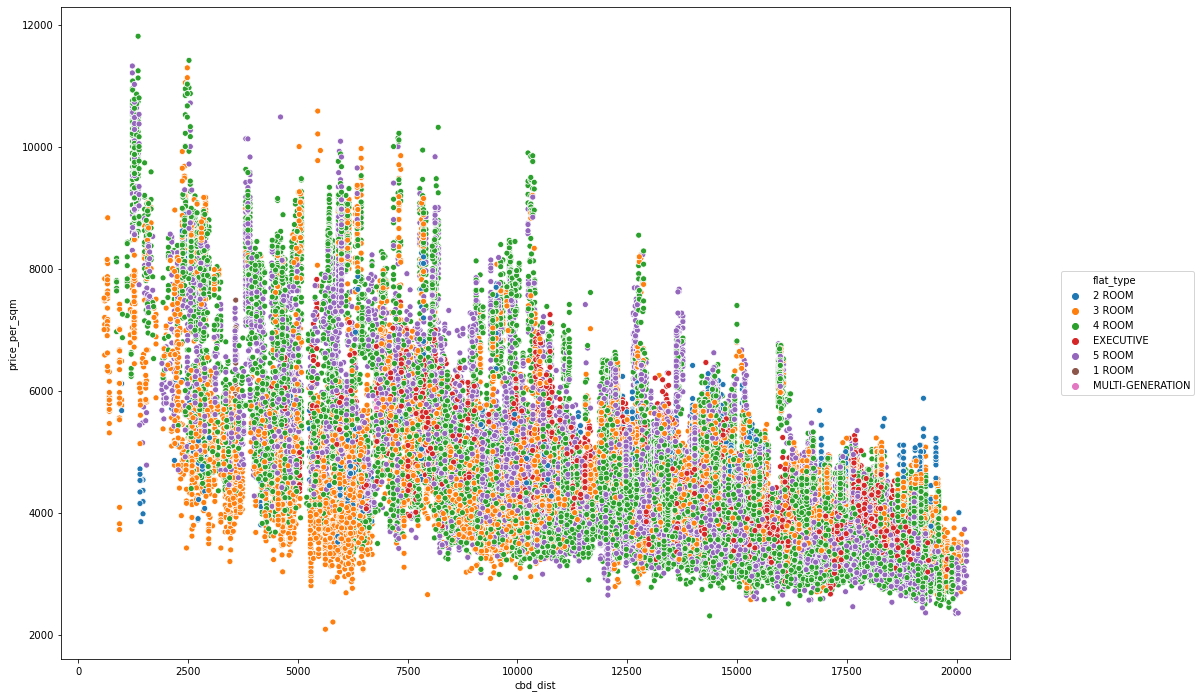

In [34]:
# Plotting Bit-Rent Scatterplot
import seaborn as sns
fig, ax1 = plt.subplots(1, 1, figsize=(20, 12))
g = sns.scatterplot(
    x=combined["cbd_dist"],
    y=combined["price_per_sqm"],
    hue=combined["flat_type"],
    ax=ax1,
)

box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 0.85, box.height])  # resize position

g.legend(loc="center right", bbox_to_anchor=(1.2, 0.5), ncol=1)

plt.show()

/home/febriyan/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


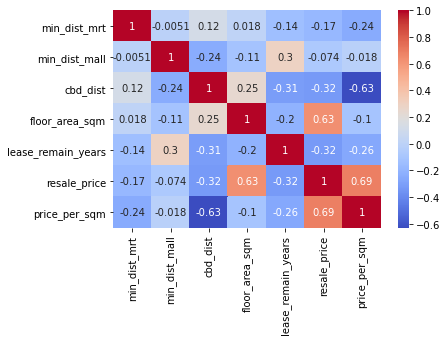

In [35]:
# Let's examine the correlation between our features
df_numerical_cols = combined[
    [
        "min_dist_mrt",
        "min_dist_mall",
        "cbd_dist",
        "floor_area_sqm",
        "lease_remain_years",
        "resale_price",
        "price_per_sqm",
    ]
]

df_numerical_cols.describe().round(0)

df_numerical_cols.dropna(inplace=True)

df_numerical_cols.isna().sum()


corrMatrix = df_numerical_cols.corr()
sns.heatmap(
    corrMatrix,
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap="coolwarm",
    annot=True,
)

In [36]:
# Separate our numerical and categorical variables
cat_features = ["town", "flat_type", "storey_range"]
num_features = [
    "min_dist_mrt",
    "min_dist_mall",
    "cbd_dist",
    "floor_area_sqm",
    "lease_remain_years",
    "resale_price",
    "price_per_sqm",
]
target = ["resale_price"]

df_reg = combined[
    [
        "town",
        "flat_type",
        "storey_range",
        "min_dist_mrt",
        "min_dist_mall",
        "cbd_dist",
        "floor_area_sqm",
        "lease_remain_years",
        "resale_price",
        "price_per_sqm",
    ]
]

df_reg["flat_type"].value_counts()

4 ROOM              28240
5 ROOM              16903
3 ROOM              16352
EXECUTIVE            5457
2 ROOM                985
MULTI-GENERATION       33
1 ROOM                 30
Name: flat_type, dtype: int64

In [37]:
# Mapping ordinal categories to their respective values
flat_type_map = {
    "EXECUTIVE": 7,
    "MULTI-GENERATION": 6,
    "5 ROOM": 5,
    "4 ROOM": 4,
    "3 ROOM": 3,
    "2 ROOM": 2,
    "1 ROOM": 1,
}

df_reg["flat_type_mapped"] = df_reg["flat_type"].map(lambda x: flat_type_map[x])

df_reg.head()

df_reg["storey_range"].value_counts()

/home/febriyan/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


04 TO 06    15752
07 TO 09    14470
10 TO 12    12945
01 TO 03    12144
13 TO 15     6307
16 TO 18     2859
19 TO 21     1254
22 TO 24      941
25 TO 27      499
28 TO 30      327
34 TO 36      143
31 TO 33      137
37 TO 39      135
40 TO 42       64
46 TO 48       11
43 TO 45        6
49 TO 51        6
Name: storey_range, dtype: int64

In [38]:
def split_mean(x):
    split_list = x.split(" TO ")
    mean = (float(split_list[0]) + float(split_list[1])) / 2
    return mean

In [39]:
df_reg["storey_mean"] = df_reg["storey_range"].apply(lambda x: split_mean(x))

/home/febriyan/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_reg.head()

,town,flat_type,storey_range,min_dist_mrt,min_dist_mall,cbd_dist,floor_area_sqm,lease_remain_years,resale_price,price_per_sqm,flat_type_mapped,storey_mean
0,ANG MO KIO,2 ROOM,10 TO 12,957.270738,999.942354,8740.633393,44.0,40,232000.0,5272.727273,2,11.0
1,ANG MO KIO,2 ROOM,10 TO 12,957.270738,999.942354,8740.633393,44.0,40,235000.0,5340.909091,2,11.0
2,ANG MO KIO,2 ROOM,01 TO 03,957.270738,999.942354,8740.633393,44.0,40,210000.0,4772.727273,2,2.0
3,ANG MO KIO,2 ROOM,01 TO 03,957.270738,999.942354,8740.633393,44.0,40,202000.0,4590.909091,2,2.0
4,ANG MO KIO,2 ROOM,07 TO 09,957.270738,999.942354,8740.633393,44.0,40,220000.0,5000.000000,2,8.0


In [41]:
# One-Hot Encoding for our categorical variables and drop 1 of our dummy variables
df_reg = pd.get_dummies(data=df_reg, columns=["town"], drop_first=True)

In [42]:
df_reg.columns

Index(['flat_type', 'storey_range', 'min_dist_mrt', 'min_dist_mall',
       'cbd_dist', 'floor_area_sqm', 'lease_remain_years', 'resale_price',
       'price_per_sqm', 'flat_type_mapped', 'storey_mean', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN'],
      dtype='object')

In [45]:
# Creating our Linear Regression Model
import statsmodels.api as sm

X = df_reg[
    [
        "min_dist_mrt",
        "min_dist_mall",
        "cbd_dist",
        "floor_area_sqm",
        "lease_remain_years",
        "flat_type_mapped",
        "storey_mean",
        "town_BEDOK",
        "town_BISHAN",
        "town_BUKIT BATOK",
        "town_BUKIT MERAH",
        "town_BUKIT PANJANG",
        "town_BUKIT TIMAH",
        "town_CENTRAL AREA",
        "town_CHOA CHU KANG",
        "town_CLEMENTI",
        "town_GEYLANG",
        "town_HOUGANG",
        "town_JURONG EAST",
        "town_JURONG WEST",
        "town_KALLANG/WHAMPOA",
        "town_MARINE PARADE",
        "town_PASIR RIS",
        "town_PUNGGOL",
        "town_QUEENSTOWN",
        "town_SEMBAWANG",
        "town_SENGKANG",
        "town_SERANGOON",
        "town_TAMPINES",
        "town_TOA PAYOH",
        "town_WOODLANDS",
        "town_YISHUN",
    ]
]

y = df_reg["price_per_sqm"]  ## Y usually means our output/dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model

In [46]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()  ## sm.OLS(output, input)
predictions = model.predict(X)

In [47]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_per_sqm   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     9866.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        06:54:30   Log-Likelihood:            -5.2018e+05
No. Observations:               68000   AIC:                         1.040e+06
Df Residuals:                   67967   BIC:                         1.041e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8317.7356     29.089    285.945      0.000    8260.722    8374.749
min_dist_mrt            -0.5861      0.005   -115.552      0.000      -0.596      -0.576
min_dist_mall           -0.2771      0.006    -46.017      0.000      -0.289      -0.265
cbd_dist                -0.1432      0.003    -56.779      0.000      -0.148      -0.138
floor_area_sqm          -9.8510      0.234    -42.078      0.000     -10.310      -9.392
lease_remain_years     -52.4298      0.208   -251.891      0.000     -52.838     -52.022
flat_type_mapped       196.7853      5.019     39.206      0.000     186.947     206.623
storey_mean             46.8900      0.376    124.832      0.000      46.154      47.626
town_BEDOK             -20.0121     12.596     -1.589      0.112     -44.701       4.677
town_BISHAN            663.8459     17.528     37.873      0.000     629.491     698.201
town_BUKIT BATOK      -422.2150     16.866    -25.034      0.000    -455.272    -389.158
town_BUKIT MERAH       135.0387     21.047      6.416      0.000      93.786     176.291
town_BUKIT PANJANG    -736.1994     18.486    -39.825      0.000    -772.432    -699.967
town_BUKIT TIMAH      1568.9944     37.828     41.477      0.000    1494.852    1643.137
town_CENTRAL AREA      416.3135     31.043     13.411      0.000     355.469     477.158
town_CHOA CHU KANG    -988.6729     22.126    -44.683      0.000   -1032.040    -945.305
town_CLEMENTI          391.0449     16.184     24.162      0.000     359.323     422.766
town_GEYLANG          -218.7535     18.065    -12.109      0.000    -254.162    -183.345
town_HOUGANG          -725.5537     13.329    -54.435      0.000    -751.678    -699.429
town_JURONG EAST        24.0235     19.156      1.254      0.210     -13.522      61.569
town_JURONG WEST      -328.1875     22.672    -14.476      0.000    -372.624    -283.751
town_KALLANG/WHAMPOA  -175.6105     20.424     -8.598      0.000    -215.642    -135.579
town_MARINE PARADE    1969.2364     28.263     69.676      0.000    1913.842    2024.631
town_PASIR RIS        -156.2642     19.958     -7.830      0.000    -195.381    -117.147
town_PUNGGOL          -800.5261     17.680    -45.279      0.000    -835.178    -765.874
town_QUEENSTOWN        640.1469     17.304     36.994      0.000     606.231     674.063
town_SEMBAWANG        -887.4061     27.982    -31.714      0.000    -942.250    -832.562
town_SENGKANG        -1024.5962     14.624    -70.065      0.000   -1053.258    -995.934
town_SERANGOON          39.4206     16.687      2.362      0.018       6.714      72.128
town_TAMPINES          -13.0484     14.974     -0.871      0.384     -42.398      16.301
town_TOA PAYOH         -77.0152     16.995     -4.532      0.000    -110.324     -43.706
town_WOODLANDS        -587.1145     25.121    -23.371    

In [48]:
df_reg["pred_error"] = predictions - df_reg["price_per_sqm"]
df_reg["pred_error"].abs().mean()

df_reg["price_per_sqm"].mean()

4518.037617160907

In [49]:
# Obtaining our Model Performance Metrics
from sklearn import metrics

print(
    "Mean Absolute Error:",
    metrics.mean_absolute_error(df_reg["price_per_sqm"], predictions),
)
print(
    "Mean Squared Error:",
    metrics.mean_squared_error(df_reg["price_per_sqm"], predictions),
)
print(
    "Root Mean Squared Error:",
    np.sqrt(metrics.mean_squared_error(df_reg["price_per_sqm"], predictions)),
)

Mean Absolute Error: 382.9593428892296
Mean Squared Error: 258230.49370229436
Root Mean Squared Error: 508.1638453316945
